# Timeseries analysis

A time series is a sequence of data points recorded through time. 

Thus, when dealing with time series data, order matters. Specifically, values in a time series express a dependency on time. Consequently, if we change the order of a time series, we may change the meaning of the data.

Time series analysis is one of the most applied data science technique in business, earthquake prediction, supply chain management, weather prediction etc & you always need to retrain your models to generate a precised prediction

Usually, time series data have two important properties.
* Data is measured sequentially and equally spaced in time.
* Each time unit has at most one data measurement.

In addition, when doing time series forecasting, we usually have two goals.
* First, we want to identify patterns that explain the behavior of the time series.
* Second, we want to use these patterns to forecast (predict) new values.

<img src = https://miro.medium.com/max/1400/1*m0cwyizRTEWrVd2hEWFHiQ.png width = 500>

This kernel is still a work in progress, especially the modelling section as I am still getting my head around it!

Notebooks used: 
* https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series/input?
* https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231
* https://www.kaggle.com/kanncaa1/time-series-prediction-tutorial-with-eda
    
Further reading: https://medium.com/better-programming/fundamentals-of-time-series-data-and-forecasting-15e9490b2618    

In [165]:
# Install statsmodel library package which is important for more in-depth timeseries analysis and modelling

# pip install statsmodels

In [153]:
# Importing relevant libraries

# Data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff 

# statistics
import math
from sklearn.metrics import mean_squared_error
from numpy.random import normal, seed

# statsmodels for timeseries analysis
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # for autocorrelation plots
from statsmodels.tsa.stattools import adfuller  # for random walk analysis
from statsmodels.tsa.arima_model import ARMA # autoregressive modelling
from statsmodels.tsa.arima_process import ArmaProcess # autoregressive modelling
from statsmodels.tsa.arima_model import ARIMA # autoregressive modelling

# Pylab for using rcParams to customise Matplotlib with style sheets: https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
from pylab import rcParams

# In this notebook we will be working with:

1. Google Stocks Data
2. Humidity in different world cities
3. Microsoft Stocks Data
4. Pressure in different world cities

# Importing time series data

In [2]:
# Google stocks data
# The required time series column is imported as a datetime column using parse_dates parameter and is also selected as index of the dataframe using index_col parameter.

google = pd.read_csv('./data/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

In [3]:
google

Open     High      Low    Close    Volume   Name
Date                                                           
2006-01-03   211.47   218.05   209.32   217.83  13137450  GOOGL
2006-01-04   222.17   224.70   220.09   222.84  15292353  GOOGL
2006-01-05   223.22   226.00   220.97   225.85  10815661  GOOGL
2006-01-06   228.66   235.49   226.85   233.06  17759521  GOOGL
2006-01-09   233.44   236.94   230.70   233.68  12795837  GOOGL
...             ...      ...      ...      ...       ...    ...
2017-12-22  1070.00  1071.72  1067.64  1068.86    889446  GOOGL
2017-12-26  1068.64  1068.86  1058.64  1065.85    918767  GOOGL
2017-12-27  1066.60  1068.27  1058.38  1060.20   1116203  GOOGL
2017-12-28  1062.25  1064.84  1053.38  1055.95    994249  GOOGL
2017-12-29  1055.49  1058.05  1052.70  1053.40   1180340  GOOGL

[3019 rows x 6 columns]

In [4]:
# humidity data

humidity = pd.read_csv('./data/humidity.csv', index_col='datetime', parse_dates=['datetime'])

In [5]:
humidity

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 12:00:00        NaN       NaN            NaN      NaN          NaN   
2012-10-01 13:00:00       76.0      81.0           88.0     81.0         88.0   
2012-10-01 14:00:00       76.0      80.0           87.0     80.0         88.0   
2012-10-01 15:00:00       76.0      80.0           86.0     80.0         88.0   
2012-10-01 16:00:00       77.0      80.0           85.0     79.0         88.0   
...                        ...       ...            ...      ...          ...   
2017-11-29 20:00:00        NaN      81.0            NaN     93.0         24.0   
2017-11-29 21:00:00        NaN      71.0            NaN     87.0         21.0   
2017-11-29 22:00:00        NaN      71.0            NaN     93.0         23.0   
2017-11-29 23:00:00        NaN      71.0            NaN     87.0         14.0   
2017-11-30 00:00:00        NaN      76.0            NaN     75.0         56.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2012-10-01 12:00:00        NaN        NaN      NaN          NaN     NaN  ...   
2012-10-01 13:00:00       82.0       22.0     23.0         50.0    62.0  ...   
2012-10-01 14:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 15:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 16:00:00       81.0       21.0     23.0         49.0    62.0  ...   
...                        ...        ...      ...          ...     ...  ...   
2017-11-29 20:00:00       72.0       18.0     68.0         37.0    18.0  ...   
2017-11-29 21:00:00       72.0       18.0     73.0         34.0    12.0  ...   
2017-11-29 22:00:00       68.0       17.0     60.0         32.0    15.0  ...   
2017-11-29 23:00:00       63.0       17.0     33.0         30.0    28.0  ...   
2017-11-30 00:00:00       72.0       17.0     23.0         34.0    31.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2012-10-01 12:00:00           NaN       NaN       NaN     NaN        NaN   
2012-10-01 13:00:00          71.0      58.0      93.0    68.0       50.0   
2012-10-01 14:00:00          70.0      57.0      91.0    68.0       51.0   
2012-10-01 15:00:00          70.0      57.0      87.0    68.0       51.0   
2012-10-01 16:00:00          69.0      57.0      84.0    68.0       52.0   
...                           ...       ...       ...     ...        ...   
2017-11-29 20:00:00          27.0       NaN      64.0    37.0        NaN   
2017-11-29 21:00:00          29.0       NaN      59.0    74.0        NaN   
2017-11-29 22:00:00          31.0       NaN      66.0    74.0        NaN   
2017-11-29 23:00:00          26.0       NaN      58.0    56.0        NaN   
2017-11-30 00:00:00          32.0       NaN      58.0    56.0        NaN   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2012-10-01 12:00:00                NaN   25.0    NaN        NaN        NaN  
2012-10-01 13:00:00               63.0   22.0   51.0       51.0       50.0  
2012-10-01 14:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 15:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 16:00:00               62.0   22.0   51.0       51.0       50.0  
...                                ...    ...    ...        ...        ...  
2017-11-29 20:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 21:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 22:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-29 23:00:00                NaN    NaN    NaN        NaN        NaN  
2017-11-30 00

# Exploratory data analysis

In [6]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
 1   High    3019 non-null   float64
 2   Low     3019 non-null   float64
 3   Close   3019 non-null   float64
 4   Volume  3019 non-null   int64  
 5   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [7]:
google.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [8]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45253 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Vancouver          43427 non-null  float64
 1   Portland           44804 non-null  float64
 2   San Francisco      44311 non-null  float64
 3   Seattle            44964 non-null  float64
 4   Los Angeles        45101 non-null  float64
 5   San Diego          44909 non-null  float64
 6   Las Vegas          44411 non-null  float64
 7   Phoenix            43945 non-null  float64
 8   Albuquerque        44543 non-null  float64
 9   Denver             43445 non-null  float64
 10  San Antonio        44689 non-null  float64
 11  Dallas             44934 non-null  float64
 12  Houston            45132 non-null  float64
 13  Kansas City        44741 non-null  float64
 14  Minneapolis        44743 non-null  float64
 15  Saint Louis        43964 non-null  

In [9]:
humidity.isnull().sum()

Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerusalem             906
dtype: int64

## Looks like all the data is in numerical format. The Google data has no null values but the humidity has quite a few

# Cleaning and preparing data

In [10]:
pd.options.display.max_columns = 100
humidity.head(3)

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 12:00:00        NaN       NaN            NaN      NaN          NaN   
2012-10-01 13:00:00       76.0      81.0           88.0     81.0         88.0   
2012-10-01 14:00:00       76.0      80.0           87.0     80.0         88.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  \
datetime                                                                  
2012-10-01 12:00:00        NaN        NaN      NaN          NaN     NaN   
2012-10-01 13:00:00       82.0       22.0     23.0         50.0    62.0   
2012-10-01 14:00:00       81.0       21.0     23.0         49.0    62.0   

                     San Antonio  Dallas  Houston  Kansas City  Minneapolis  \
datetime                                                                      
2012-10-01 12:00:00          NaN     NaN      NaN          NaN          NaN   
2012-10-01 13:00:00         93.0    87.0     93.0         71.0         67.0   
2012-10-01 14:00:00         92.0    86.0     92.0         70.0         66.0   

                     Saint Louis  Chicago  Nashville  Indianapolis  Atlanta  \
datetime                                                                      
2012-10-01 12:00:00          NaN      NaN        NaN           NaN      NaN   
2012-10-01 13:00:00         71.0     71.0      100.0          76.0     94.0   
2012-10-01 14:00:00         71.0     70.0       99.0          76.0     94.0   

                     Detroit  Jacksonville  Charlotte  Miami  Pittsburgh  \
datetime                                                                   
2012-10-01 12:00:00      NaN           NaN        NaN    NaN         NaN   
2012-10-01 13:00:00     76.0          88.0       87.0   83.0        93.0   
2012-10-01 14:00:00     75.0          87.0       87.0   82.0        93.0   

                     Toronto  Philadelphia  New York  Montreal  Boston  \
datetime                                                                 
2012-10-01 12:00:00      NaN           NaN       NaN       NaN     NaN   
2012-10-01 13:00:00     82.0          71.0      58.0      93.0    68.0   
2012-10-01 14:00:00     81.0          70.0      57.0      91.0    68.0   

                     Beersheba  Tel Aviv District  Eilat  Haifa  Nahariyya  \
datetime                                                                     
2012-10-01 12:00:00        NaN                NaN   25.0    NaN        NaN   
2012-10-01 13:00:00       50.0               63.0   22.0   51.0       51.0   
2012-10-01 14:00:00       51.0               62.0   22.0   51.0       51.0   

                     Jerusalem  
datetime                        
2012-10-01 12:00:00        NaN  
2012-10-01 13:00:00       50.0  
2012-10-01 14:00:00       50.0

In [11]:
humidity = humidity.iloc[1:]

# Use forward fill parameter to fill NA values which propagates last valid observations to fill gaps

humidity = humidity.fillna(method='ffill')
humidity.head()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 13:00:00       76.0      81.0           88.0     81.0         88.0   
2012-10-01 14:00:00       76.0      80.0           87.0     80.0         88.0   
2012-10-01 15:00:00       76.0      80.0           86.0     80.0         88.0   
2012-10-01 16:00:00       77.0      80.0           85.0     79.0         88.0   
2012-10-01 17:00:00       78.0      79.0           84.0     79.0         88.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  \
datetime                                                                  
2012-10-01 13:00:00       82.0       22.0     23.0         50.0    62.0   
2012-10-01 14:00:00       81.0       21.0     23.0         49.0    62.0   
2012-10-01 15:00:00       81.0       21.0     23.0         49.0    62.0   
2012-10-01 16:00:00       81.0       21.0     23.0         49.0    62.0   
2012-10-01 17:00:00       80.0       21.0     24.0         49.0    63.0   

                     San Antonio  Dallas  Houston  Kansas City  Minneapolis  \
datetime                                                                      
2012-10-01 13:00:00         93.0    87.0     93.0         71.0         67.0   
2012-10-01 14:00:00         92.0    86.0     92.0         70.0         66.0   
2012-10-01 15:00:00         92.0    86.0     90.0         70.0         66.0   
2012-10-01 16:00:00         92.0    86.0     89.0         70.0         65.0   
2012-10-01 17:00:00         92.0    86.0     88.0         69.0         65.0   

                     Saint Louis  Chicago  Nashville  Indianapolis  Atlanta  \
datetime                                                                      
2012-10-01 13:00:00         71.0     71.0      100.0          76.0     94.0   
2012-10-01 14:00:00         71.0     70.0       99.0          76.0     94.0   
2012-10-01 15:00:00         71.0     70.0       99.0          76.0     94.0   
2012-10-01 16:00:00         71.0     70.0       99.0          76.0     94.0   
2012-10-01 17:00:00         71.0     69.0       99.0          76.0     94.0   

                     Detroit  Jacksonville  Charlotte  Miami  Pittsburgh  \
datetime                                                                   
2012-10-01 13:00:00     76.0          88.0       87.0   83.0        93.0   
2012-10-01 14:00:00     75.0          87.0       87.0   82.0        93.0   
2012-10-01 15:00:00     75.0          87.0       87.0   82.0        93.0   
2012-10-01 16:00:00     74.0          87.0       87.0   82.0        93.0   
2012-10-01 17:00:00     74.0          86.0       87.0   81.0        93.0   

                     Toronto  Philadelphia  New York  Montreal  Boston  \
datetime                                                                 
2012-10-01 13:00:00     82.0          71.0      58.0      93.0    68.0   
2012-10-01 14:00:00     81.0          70.0      57.0      91.0    68.0   
2012-10-01 15:00:00     79.0          70.0      57.0      87.0    68.0   
2012-10-01 16:00:00     77.0          69.0      57.0      84.0    68.0   
2012-10-01 17:00:00     76.0          69.0      57.0      80.0    68.0   

                     Beersheba  Tel Aviv District  Eilat  Haifa  Nahariyya  \
datetime                                                                     
2012-10-01 13:00:00       50.0               63.0   22.0   51.0       51.0   
2012-10-01 14:00:00       51.0               62.0   22.0   51.0       51.0   
2012-10-01 15:00:00       51.0               62.0   22.0   51.0       51.0   
2012-10-01 16:00:00       52.0               62.0   22.0   51.0       51.0   
2012-10-01 17:00:00       54.0               62.0   23.0   51.0       51.0   

                     Jerusalem  
datetime                        
2012-10-01 13:00:00       50.0  
2012-10-01 14:00:00       50.0  
2012-10-01 15:00:00       50.0  
2012-10-01 16:00:00       50.0  
2012-10-01 17:00:00   

# Visualising datasets

## Humidity plots

In [12]:
# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
# Think of it as binning (averaging) the data over the period interval

# humidity["Kansas City"].asfreq('D')
humidity["Kansas City"].asfreq('M')
# humidity["Kansas City"].asfreq('Y')

datetime
2012-10-31 13:00:00     69.0
2012-11-30 13:00:00     84.0
2012-12-31 13:00:00     68.0
2013-01-31 13:00:00     71.0
2013-02-28 13:00:00     86.0
                       ...  
2017-06-30 13:00:00     88.0
2017-07-31 13:00:00     77.0
2017-08-31 13:00:00    100.0
2017-09-30 13:00:00     63.0
2017-10-31 13:00:00     74.0
Freq: M, Name: Kansas City, Length: 61, dtype: float64

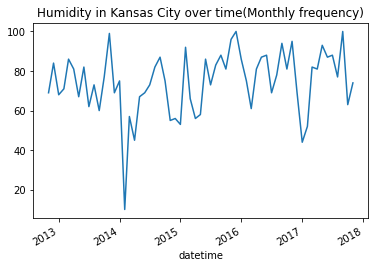

In [13]:
# Directly plot frequency 

humidity["Kansas City"].asfreq('M').plot() 
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

In [14]:
humidity.index

DatetimeIndex(['2012-10-01 13:00:00', '2012-10-01 14:00:00',
               '2012-10-01 15:00:00', '2012-10-01 16:00:00',
               '2012-10-01 17:00:00', '2012-10-01 18:00:00',
               '2012-10-01 19:00:00', '2012-10-01 20:00:00',
               '2012-10-01 21:00:00', '2012-10-01 22:00:00',
               ...
               '2017-11-29 15:00:00', '2017-11-29 16:00:00',
               '2017-11-29 17:00:00', '2017-11-29 18:00:00',
               '2017-11-29 19:00:00', '2017-11-29 20:00:00',
               '2017-11-29 21:00:00', '2017-11-29 22:00:00',
               '2017-11-29 23:00:00', '2017-11-30 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=45252, freq=None)

### Plotting humidity data with Seaborn

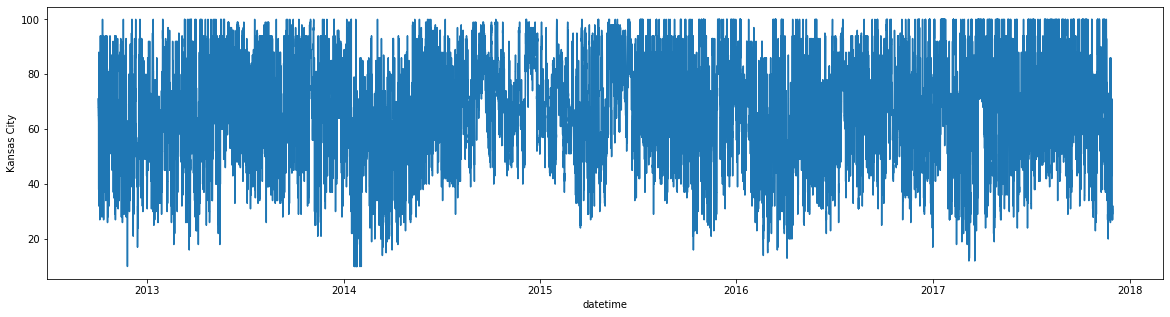

In [15]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=humidity, x=humidity.index, y=humidity['Kansas City'])

Text(0.5, 1.0, 'Humidity in Kansas City over time (Monthly frequency)')

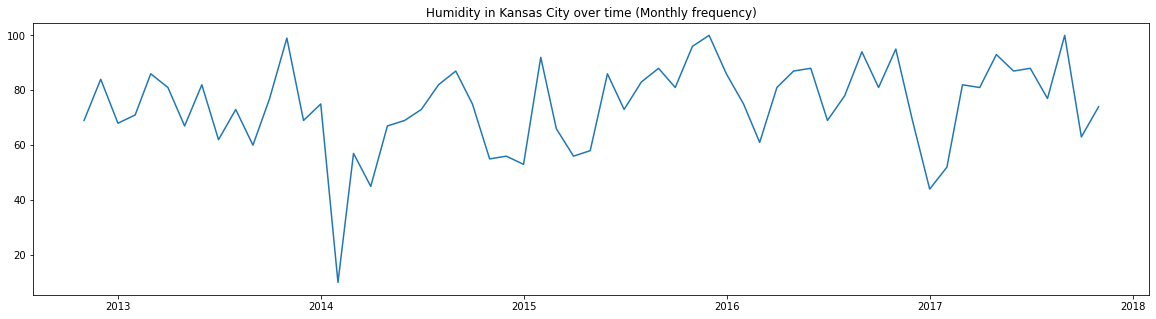

In [16]:
# plotting directly useing .asfreq() function

plt.figure(figsize=(20, 5))
sns.lineplot(data=humidity['Kansas City'].asfreq('M')).set_title('Humidity in Kansas City over time (Monthly frequency)')

## Google stock plots

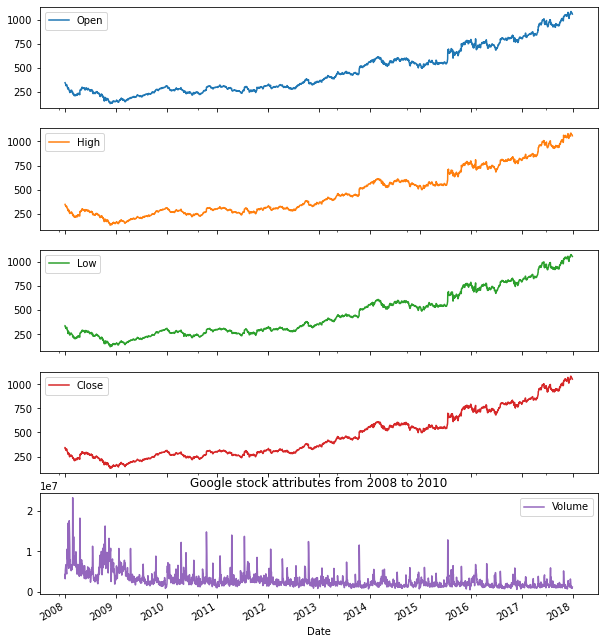

In [17]:
google['2008':'2017'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.show()

# Timestamps and Periods

What are timestamps and periods and how are they useful?

* Timestamps are used to represent a point in time. Periods represent an interval in time. Periods can used to check if a specific event in the given period. They can also be converted to each other's form.

In [18]:
# Creating a Timestamp

timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

Timestamp('2017-01-01 12:00:00')

In [19]:
# Creating a period

period = pd.Period('2017-01-01', freq='D')
period

Period('2017-01-01', 'D')

In [20]:
# Period start time

period.start_time

Timestamp('2017-01-01 00:00:00')

In [21]:
# Period end time

period.end_time

Timestamp('2017-01-01 23:59:59.999999999')

In [22]:
# Checking if the given timestamp exists in the given period

period.start_time < timestamp < period.end_time

True

In [23]:
# Converting timestamp to period

new_period = timestamp.to_period(freq='H')
new_period

Period('2017-01-01 12:00', 'H')

In [24]:
# Converting period to timestamp

new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2017-01-01 00:00:00')

# Using date_range

What is date_range and how is it useful?

* date_range is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [25]:
# Creating a datetimeindex with daily frequency

dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [26]:
# Creating a datetimeindex with monthly frequency

dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [27]:
# Creating a datetimeindex without specifying start date and using periods

dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [28]:
# Creating a datetimeindex specifying start date , end date and periods

dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

# Using to_datetime

pandas.to_datetime() is used for converting arguments to datetime. Here, a DataFrame is converted to a datetime series.

In [29]:
df = pd.DataFrame({'year': [2019, 2020], 
                   'month': [6, 12], 
                   'day': [1, 3]})
df

year  month  day
0  2019      6    1
1  2020     12    3

In [30]:
df = pd.to_datetime(df)
df

0   2019-06-01
1   2020-12-03
dtype: datetime64[ns]

In [31]:
df = pd.to_datetime('01-01-2019')
df

Timestamp('2019-01-01 00:00:00')

# Shifting and lags

We can shift index by desired number of periods with an optional time frequency. This is useful when **comparing the time series with a past of itself.**

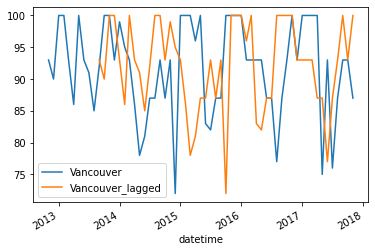

In [32]:
humidity["Vancouver"].asfreq('M').plot(legend=True)

# Shifting the index 
shifted = humidity["Vancouver"].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_lagged'])
plt.show()

# Resampling

## Upsampling

* Time series is resampled from low frequency to high frequency (Monthly to daily frequency). It involves filling or interpolating missing data

## Downsampling

* Time series is resampled from high frequency to low frequency (Weekly to monthly frequency). It involves aggregation of existing data.

In [33]:
# Let's use the pressure data to demonstrate this

pressure = pd.read_csv('./data/pressure.csv', index_col='datetime', parse_dates=['datetime'])
pressure

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 12:00:00        NaN       NaN            NaN      NaN          NaN   
2012-10-01 13:00:00        NaN    1024.0         1009.0   1027.0       1013.0   
2012-10-01 14:00:00        NaN    1024.0         1009.0   1027.0       1013.0   
2012-10-01 15:00:00        NaN    1024.0         1009.0   1028.0       1013.0   
2012-10-01 16:00:00        NaN    1024.0         1009.0   1028.0       1013.0   
...                        ...       ...            ...      ...          ...   
2017-11-29 20:00:00        NaN    1031.0            NaN   1030.0       1016.0   
2017-11-29 21:00:00        NaN    1030.0            NaN   1030.0       1016.0   
2017-11-29 22:00:00        NaN    1030.0            NaN   1029.0       1015.0   
2017-11-29 23:00:00        NaN    1029.0            NaN   1028.0       1016.0   
2017-11-30 00:00:00        NaN    1029.0            NaN   1028.0       1015.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  \
datetime                                                                  
2012-10-01 12:00:00        NaN        NaN      NaN          NaN     NaN   
2012-10-01 13:00:00     1013.0     1018.0   1013.0       1024.0  1028.0   
2012-10-01 14:00:00     1013.0     1018.0   1013.0       1024.0  1028.0   
2012-10-01 15:00:00     1013.0     1018.0   1013.0       1024.0  1028.0   
2012-10-01 16:00:00     1013.0     1018.0   1013.0       1024.0  1028.0   
...                        ...        ...      ...          ...     ...   
2017-11-29 20:00:00     1017.0     1021.0   1018.0       1025.0  1016.0   
2017-11-29 21:00:00     1017.0     1020.0   1018.0       1024.0  1018.0   
2017-11-29 22:00:00     1016.0     1020.0   1017.0       1024.0  1018.0   
2017-11-29 23:00:00     1016.0     1020.0   1016.0       1024.0  1020.0   
2017-11-30 00:00:00     1017.0     1019.0   1016.0       1024.0  1021.0   

                     San Antonio  Dallas  Houston  Kansas City  Minneapolis  \
datetime                                                                      
2012-10-01 12:00:00          NaN     NaN      NaN          NaN          NaN   
2012-10-01 13:00:00       1014.0  1011.0   1009.0       1011.0       1012.0   
2012-10-01 14:00:00       1014.0  1011.0   1008.0       1011.0       1012.0   
2012-10-01 15:00:00       1014.0  1011.0   1008.0       1011.0       1012.0   
2012-10-01 16:00:00       1014.0  1011.0   1008.0       1011.0       1012.0   
...                          ...     ...      ...          ...          ...   
2017-11-29 20:00:00       1022.0  1021.0   1021.0       1020.0       1018.0   
2017-11-29 21:00:00       1021.0  1021.0   1021.0       1021.0       1017.0   
2017-11-29 22:00:00       1021.0  1021.0   1020.0       1020.0       1016.0   
2017-11-29 23:00:00       1021.0  1021.0   1020.0       1019.0       1015.0   
2017-11-30 00:00:00       1021.0  1021.0   1020.0       1019.0       1016.0   

                     Saint Louis  Chicago  Nashville  Indianapolis  Atlanta  \
datetime                                                                      
2012-10-01 12:00:00          NaN      NaN        NaN           NaN      NaN   
2012-10-01 13:00:00       1010.0   1014.0     1005.0        1011.0   1006.0   
2012-10-01 14:00:00       1010.0   1014.0     1004.0        1011.0   1006.0   
2012-10-01 15:00:00       1010.0   1014.0     1004.0        1011.0   1006.0   
2012-10-01 16:00:00       1010.0   1014.0     1004.0        1011.0   1006.0   
...                          ...      ...        ...           ...      ...   
2017-11-29 20:00:00       1023.0   1025.0     1023.0        1025.0   1024.0   
2017-11-29 21:00:00       1022.0   1024.0     1022.0        1024.0   1023.0   
2017-11-29 22:00:00       1021.0   1024.0     1023.0        1024.0   1023.0   
2017-11-29 23:00:00       1021.0   1023.0     1023.0        1024.0   1023.0   
2017-11-30 00:0

In [34]:
pressure.isnull().sum()

Vancouver            4234
Portland                4
San Francisco         815
Seattle                13
Los Angeles           252
San Diego             175
Las Vegas              88
Phoenix               594
Albuquerque           456
Denver                543
San Antonio            17
Dallas                 60
Houston                 9
Kansas City           121
Minneapolis            17
Saint Louis            68
Chicago               725
Nashville             147
Indianapolis          289
Atlanta                49
Detroit                 5
Jacksonville           15
Charlotte               3
Miami                 794
Pittsburgh             46
Toronto               175
Philadelphia            4
New York             1041
Montreal              994
Boston                  7
Beersheba             806
Tel Aviv District     930
Eilat                 792
Haifa                 798
Nahariyya             795
Jerusalem             799
dtype: int64

## Cleaning process similar to the humidity data

In [35]:
# Forward fill

pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure.isnull().sum()

Vancouver            20
Portland              0
San Francisco         0
Seattle               0
Los Angeles           0
San Diego             0
Las Vegas             0
Phoenix               0
Albuquerque           0
Denver                0
San Antonio           0
Dallas                0
Houston               0
Kansas City           0
Minneapolis           0
Saint Louis           0
Chicago               0
Nashville             0
Indianapolis          0
Atlanta               0
Detroit               0
Jacksonville          0
Charlotte             0
Miami                 0
Pittsburgh            0
Toronto               0
Philadelphia          0
New York              0
Montreal              0
Boston                0
Beersheba             0
Tel Aviv District     0
Eilat                 0
Haifa                 0
Nahariyya             0
Jerusalem             0
dtype: int64

In [36]:
# Need to backfill to replace values in Vancouver

pressure = pressure.fillna(method='bfill')
pressure.isnull().sum()

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [37]:
# Shape before resampling(downsampling)

pressure.shape

(45252, 36)

## We downsample from hourly to 3 day frequency aggregated using mean

In [38]:
pressure = pressure.resample('3D').mean()
pressure.head()

Vancouver     Portland  San Francisco      Seattle  Los Angeles  \
datetime                                                                        
2012-10-01   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-04  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   
2012-10-07  1013.930556  1017.444444    1016.597222  1018.736111  1013.416667   
2012-10-10  1015.000000  1015.430556    1014.833333  1018.416667  1010.694444   
2012-10-13  1008.152778  1018.111111    1021.069444  1015.930556  1017.277778   

              San Diego    Las Vegas      Phoenix  Albuquerque       Denver  \
datetime                                                                      
2012-10-01  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-04  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   
2012-10-07  1014.222222  1012.888889  1011.861111  1005.833333  1020.458333   
2012-10-10  1014.013889  1000.166667  1005.611111   986.000000   984.486111   
2012-10-13  1018.375000  1015.666667  1015.500000  1013.625000  1010.444444   

            San Antonio       Dallas      Houston  Kansas City  Minneapolis  \
datetime                                                                      
2012-10-01  1014.305085  1011.525424  1009.881356  1011.915254  1012.949153   
2012-10-04  1017.708333  1016.416667  1017.652778  1017.305556  1015.111111   
2012-10-07  1020.402778  1022.819444  1018.791667  1022.986111  1017.388889   
2012-10-10  1015.236111  1016.277778  1017.791667  1014.611111  1009.625000   
2012-10-13  1017.611111  1016.555556  1017.972222  1013.680556  1014.763889   

            Saint Louis      Chicago    Nashville  Indianapolis      Atlanta  \
datetime                                                                       
2012-10-01  1009.525424  1012.372881  1004.627119   1008.949153  1006.593220   
2012-10-04  1018.388889  1015.875000  1020.652778   1018.388889  1021.430556   
2012-10-07  1023.111111  1020.569444  1021.111111   1021.180556  1017.791667   
2012-10-10  1019.069444  1015.458333  1019.333333   1017.208333  1018.208333   
2012-10-13  1016.805556  1016.347222  1021.388889   1018.708333  1023.305556   

                Detroit  Jacksonville    Charlotte        Miami   Pittsburgh  \
datetime                                                                       
2012-10-01  1013.661017   1009.271186  1011.372881  1011.915254  1012.745763   
2012-10-04  1017.277778   1020.000000  1021.222222  1018.500000  1019.069444   
2012-10-07  1019.388889   1015.347222  1017.833333  1013.958333  1018.625000   
2012-10-10  1015.708333   1018.625000  1019.513889  1016.222222  1015.611111   
2012-10-13  1019.472222   1021.569444  1025.500000  1017.333333  1021.375000   

                Toronto  Philadelphia     New York     Montreal       Boston  \
datetime                                                                       
2012-10-01  1005.711864   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-04  1006.958333   1018.097222  1017.680556  1017.180556  1019.805556   
2012-10-07  1007.694444   1017.958333  1016.750000  1014.152778  1016.305556   
2012-10-10  1007.541667   1018.694444  1017.916667  1016.166667  1017.319444   
2012-10-13  1016.097222   1025.055556  1024.388889  1020.805556  1023.736111   

             Beersheba  Tel Aviv District        Eilat        Haifa  \
datetime                                                              
2012-10-01  985.050847        1012.949153  1011.796610  1013.000000   
2012-10-04  984.930556        1013.083333  1012.611111  1013.000000   
2012-10-07  982.972222        1013.027778  1007.555556  1013.000000   
2012-10-10  979.763889        1006.527778   998.763889  1012.333333   
2012-10-13  984.527778        1013.027778  1007.194444  1013.000000   

              Nahariyya   Jerusalem  
datetime                             
2012-10-01  1013.000000  990.525424  
2012-10-04  1013.000000  990.083333  
2012-

In [39]:
# Shape after resampling(downsampling)
pressure.shape

(629, 36)

## Lots of rows have been removed. We can also upsample from 3 day frequency to daily frequency.

In [40]:
pressure = pressure.resample('D').pad()
pressure.head()

Vancouver     Portland  San Francisco      Seattle  Los Angeles  \
datetime                                                                        
2012-10-01   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-02   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-03   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-04  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   
2012-10-05  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   

              San Diego    Las Vegas      Phoenix  Albuquerque       Denver  \
datetime                                                                      
2012-10-01  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-02  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-03  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-04  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   
2012-10-05  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   

            San Antonio       Dallas      Houston  Kansas City  Minneapolis  \
datetime                                                                      
2012-10-01  1014.305085  1011.525424  1009.881356  1011.915254  1012.949153   
2012-10-02  1014.305085  1011.525424  1009.881356  1011.915254  1012.949153   
2012-10-03  1014.305085  1011.525424  1009.881356  1011.915254  1012.949153   
2012-10-04  1017.708333  1016.416667  1017.652778  1017.305556  1015.111111   
2012-10-05  1017.708333  1016.416667  1017.652778  1017.305556  1015.111111   

            Saint Louis      Chicago    Nashville  Indianapolis      Atlanta  \
datetime                                                                       
2012-10-01  1009.525424  1012.372881  1004.627119   1008.949153  1006.593220   
2012-10-02  1009.525424  1012.372881  1004.627119   1008.949153  1006.593220   
2012-10-03  1009.525424  1012.372881  1004.627119   1008.949153  1006.593220   
2012-10-04  1018.388889  1015.875000  1020.652778   1018.388889  1021.430556   
2012-10-05  1018.388889  1015.875000  1020.652778   1018.388889  1021.430556   

                Detroit  Jacksonville    Charlotte        Miami   Pittsburgh  \
datetime                                                                       
2012-10-01  1013.661017   1009.271186  1011.372881  1011.915254  1012.745763   
2012-10-02  1013.661017   1009.271186  1011.372881  1011.915254  1012.745763   
2012-10-03  1013.661017   1009.271186  1011.372881  1011.915254  1012.745763   
2012-10-04  1017.277778   1020.000000  1021.222222  1018.500000  1019.069444   
2012-10-05  1017.277778   1020.000000  1021.222222  1018.500000  1019.069444   

                Toronto  Philadelphia     New York     Montreal       Boston  \
datetime                                                                       
2012-10-01  1005.711864   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-02  1005.711864   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-03  1005.711864   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-04  1006.958333   1018.097222  1017.680556  1017.180556  1019.805556   
2012-10-05  1006.958333   1018.097222  1017.680556  1017.180556  1019.805556   

             Beersheba  Tel Aviv District        Eilat   Haifa  Nahariyya  \
datetime                                                                    
2012-10-01  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-02  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-03  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-04  984.930556        1013.083333  1012.611111  1013.0     1013.0   
2012-10-05  984.930556        1013.083333  1012.611111  1013.0     1013.0   

             Jerusalem  
datetime                
2012-10-01  990.525424  
2012-10-02  990.525424  
2012-10-03  990

In [41]:
# Shape after resampling(upsampling)
pressure.shape

(1885, 36)

# Finance and statistics

## Percent change

In [42]:
google

Open     High      Low    Close    Volume   Name
Date                                                           
2006-01-03   211.47   218.05   209.32   217.83  13137450  GOOGL
2006-01-04   222.17   224.70   220.09   222.84  15292353  GOOGL
2006-01-05   223.22   226.00   220.97   225.85  10815661  GOOGL
2006-01-06   228.66   235.49   226.85   233.06  17759521  GOOGL
2006-01-09   233.44   236.94   230.70   233.68  12795837  GOOGL
...             ...      ...      ...      ...       ...    ...
2017-12-22  1070.00  1071.72  1067.64  1068.86    889446  GOOGL
2017-12-26  1068.64  1068.86  1058.64  1065.85    918767  GOOGL
2017-12-27  1066.60  1068.27  1058.38  1060.20   1116203  GOOGL
2017-12-28  1062.25  1064.84  1053.38  1055.95    994249  GOOGL
2017-12-29  1055.49  1058.05  1052.70  1053.40   1180340  GOOGL

[3019 rows x 6 columns]

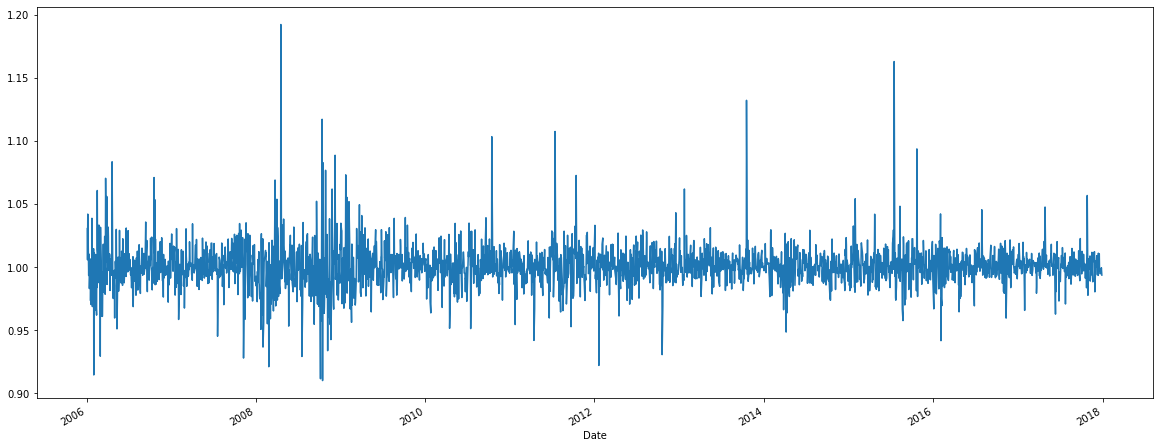

In [43]:
# div() = Get Floating division of dataframe and other, element-wise (binary operator truediv).
# shift() = Shift index by desired number of periods with an optional time freq.

# Divide the shifted/lagged data from the future to present data to return percentage change
google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(20,8))

# Stock returns

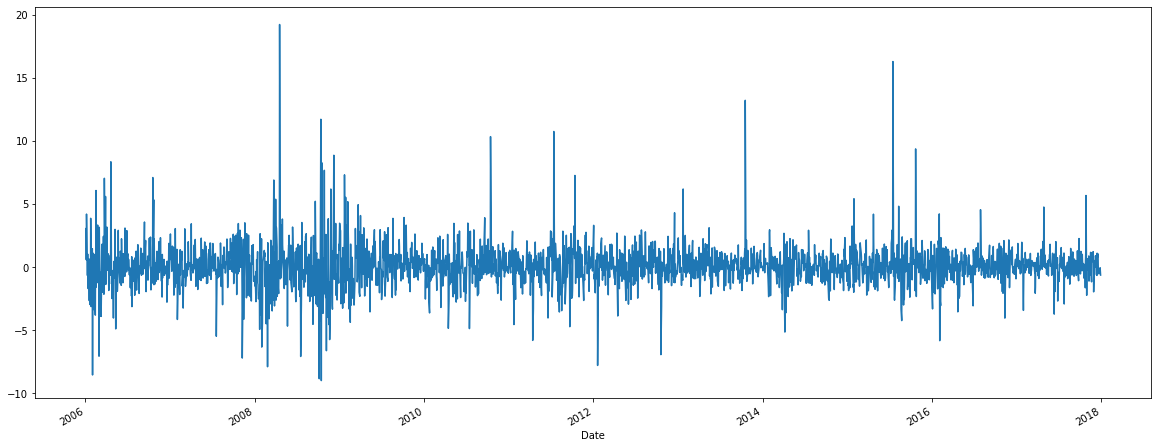

In [44]:
# sub() = Return Subtraction of series and other
# mul() = Return multiplication - a * b, for a and b numbers.

google['Return'] = google.Change.sub(1).mul(100) # minus 1 multiplied by 100, gives actual percentage
google['Return'].plot(figsize=(20,8))

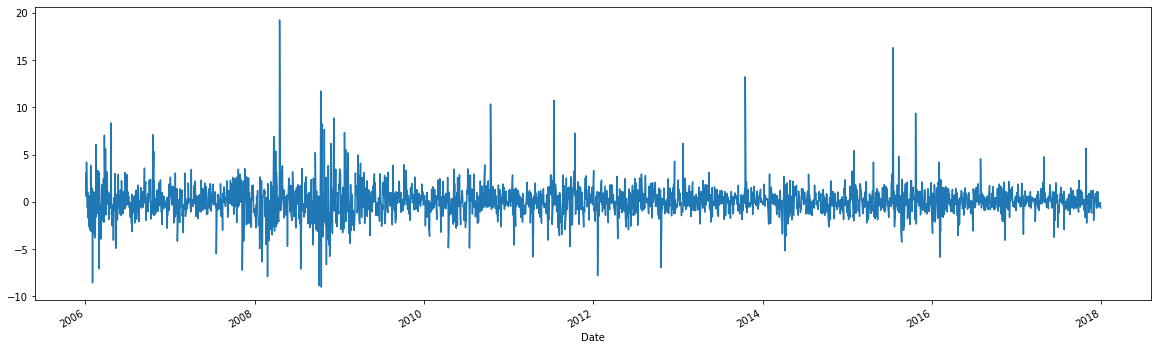

In [45]:
# Another way to calculate returns
# pct_change() = Percentage change between the current and a prior element.    
    
google.High.pct_change().mul(100).plot(figsize=(20,6))

## Absolute change in successive rows

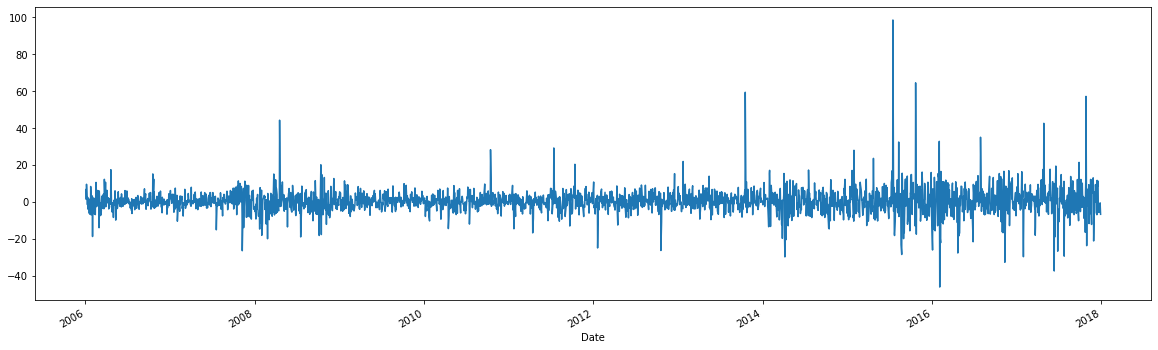

In [46]:
# diff() First discrete difference of element. Calculates the difference of a Series element compared with another element in the Series (default is element in previous row).

google.High.diff().plot(figsize=(20,6))

# Comparing two or more time series

* We will compare 2 time series by normalizing them. 
* This is achieved by dividing each time series element of all time series by the first element. 
* This way both series start at the same point and can be easily compared.

In [47]:
# We can use microsoft stocks and compare them with google

microsoft = pd.read_csv('./data/MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
microsoft

Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT
...           ...    ...    ...    ...        ...   ...
2017-12-22  85.40  85.63  84.92  85.51   14145841  MSFT
2017-12-26  85.31  85.53  85.03  85.40    9891237  MSFT
2017-12-27  85.65  85.98  85.22  85.71   14678025  MSFT
2017-12-28  85.90  85.93  85.55  85.72   10594344  MSFT
2017-12-29  85.63  86.05  85.50  85.54   18717406  MSFT

[3019 rows x 6 columns]

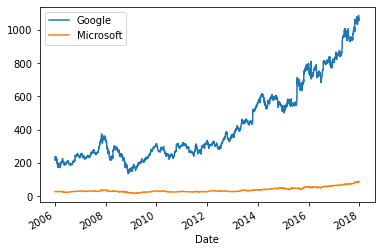

In [48]:
# Plotting before normalization

google.High.plot()
microsoft.High.plot()
plt.legend(['Google','Microsoft'])
plt.show()

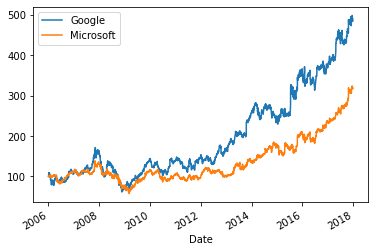

In [49]:
# Normalizing and comparison
# Both stocks start from 100

# Divide each element by the first element of the column (like a percentage change)

normalized_google = google.High.div(google.High.iloc[0]).mul(100) 
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google','Microsoft'])
plt.show()

# Window functions

Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

Rolling - Same size and sliding

Expanding - Contains all prior values

Check the article on window functions here: https://www.mikulskibartosz.name/the-difference-between-the-expanding-and-rolling-window-in-pandas/

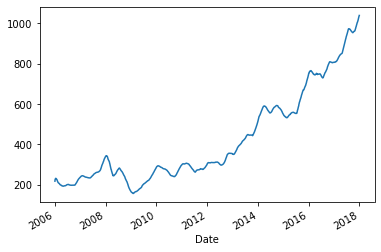

In [50]:
# Rolling window functions
# Plotting a rolling mean of 90 day window of Google stocks

rolling_google = google.High.rolling('90D').mean()
rolling_google.plot()

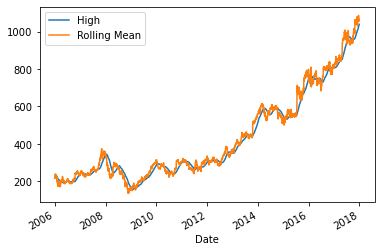

In [51]:
# Plotting a rolling mean of 90 day window with original High attribute of Google stocks

rolling_google.plot()
google.High.plot()
plt.legend(['High','Rolling Mean'])
plt.show()

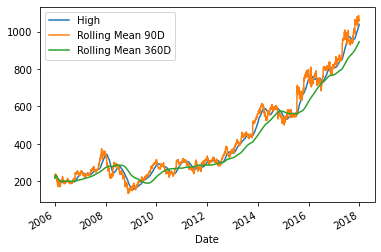

In [52]:
# Compare multiple rolling mean windows

rolling_google2 = google.High.rolling('360D').mean()

rolling_google.plot()
google.High.plot()
rolling_google2.plot()
plt.legend(['High','Rolling Mean 90D', 'Rolling Mean 360D'])
plt.show()

Notice that the rolling mean plot is a much smoother version of the original plot.

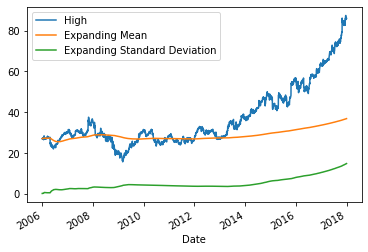

In [53]:
# Expanding window functions
# Current element is sum of previous elements, i.e. similar to cumulative sum (df.cumsum())
# Expanding function ignores NaN values in contrast to cumulative sum

microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

# Open-high-low-close Charts (OHLC) Charts

<img src = https://datavizcatalogue.com/methods/images/top_images/SVG/OHLC_chart.svg width = 500>

An OHLC chart is any type of price chart that shows the open, high, low and close price of a certain time period. 
* Open-high-low-close Charts (or OHLC Charts) are used as a trading tool to visualise and analyse the price changes over time for securities, currencies, stocks, bonds, commodities, etc. 
* OHLC Charts are useful for interpreting the day-to-day sentiment of the market and forecasting any future price changes through the patterns produced.

The y-axis on an OHLC Chart is used for the price scale, while the x-axis is the timescale. 
* On each single time period, an OHLC Charts plots a symbol that represents two ranges: the highest and lowest prices traded, and also the opening and closing price on that single time period (for example in a day). 
* On the range symbol, the high and low price ranges are represented by the length of the main vertical line. 
* The open and close prices are represented by the vertical positioning of tick-marks that appear on the left (representing the open price) and on right (representing the close price) sides of the high-low vertical line.

Colour can be assigned to each OHLC Chart symbol, to distinguish whether the market is "bullish" (the closing price is higher then it opened) or "bearish" (the closing price is lower then it opened).

<img src = https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg>

Image sources from [Datavizcatalouge.](https://datavizcatalogue.com/methods/OHLC_chart.html)

## OHLC charts with plotly library

Resource can be found https://plotly.com/python/ohlc-charts/

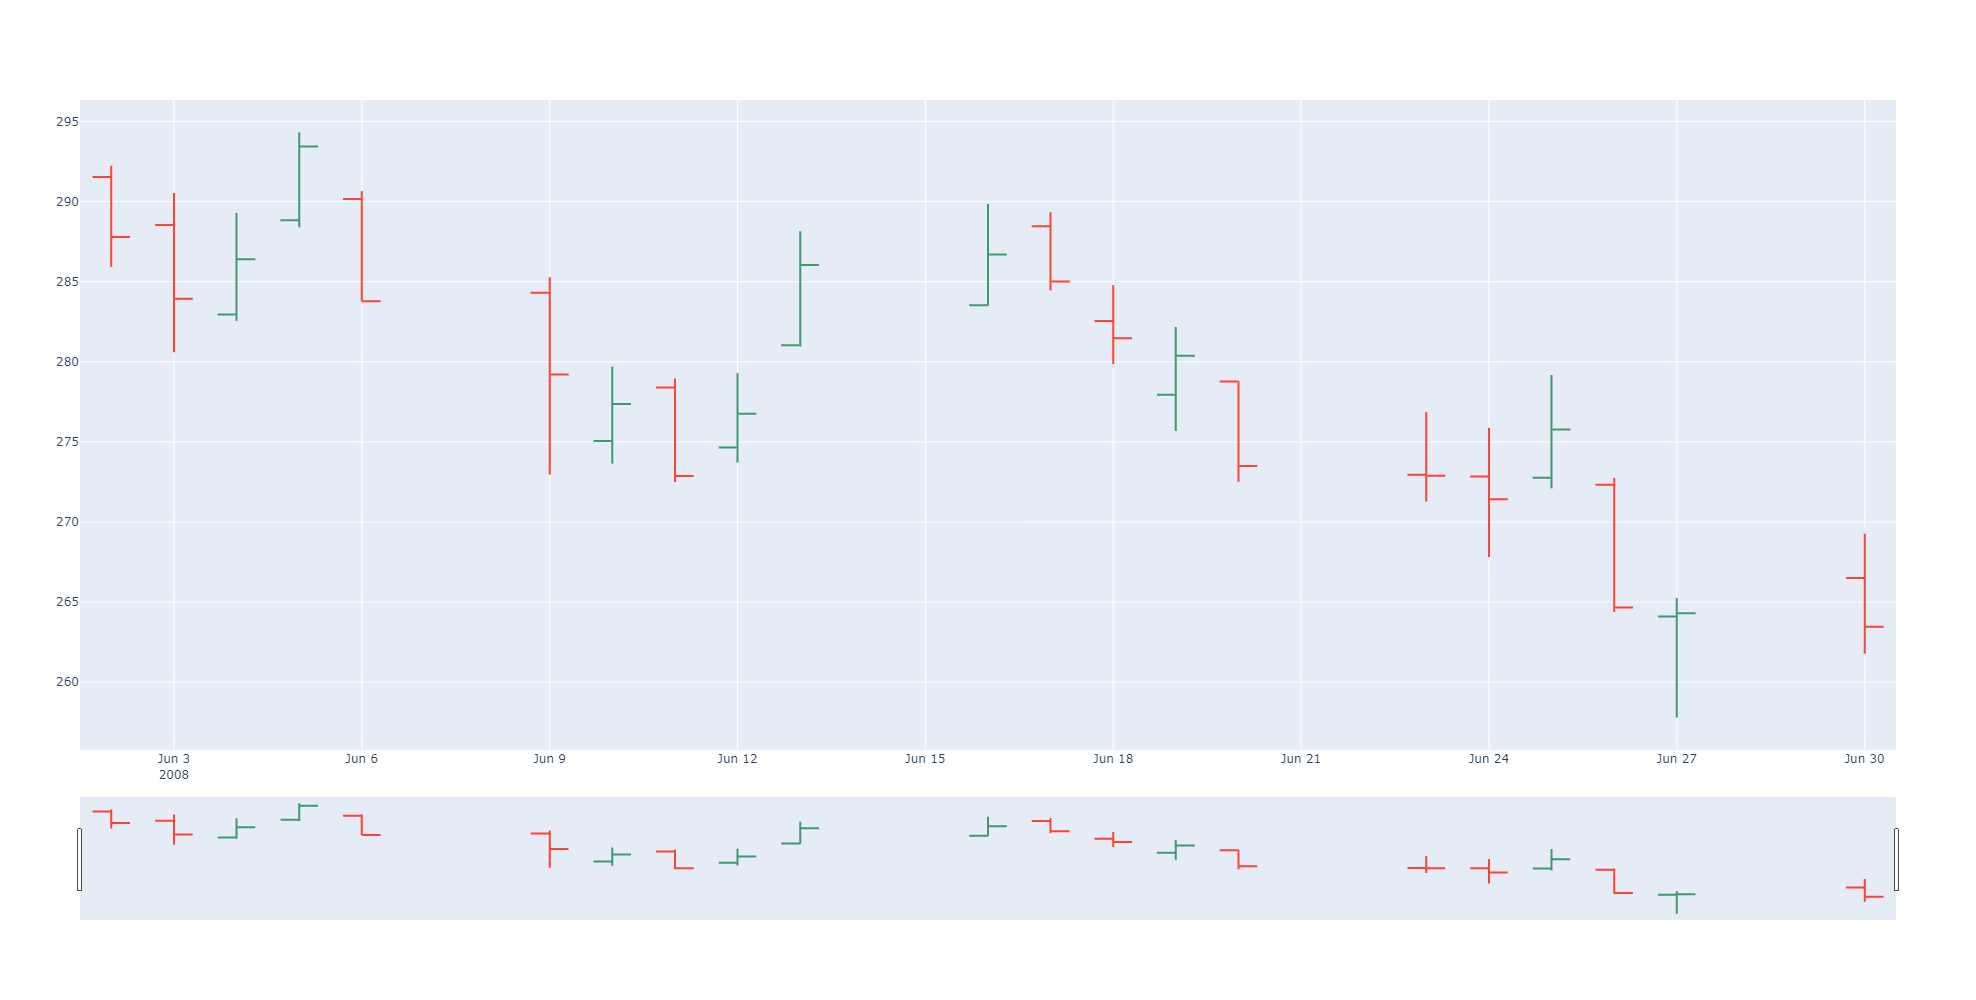

In [54]:
# OHLC chart of June 2008 of Google stocks
# Try out the rangeslider!

fig = go.Figure(data=go.Ohlc(x=google['06-2008'].index,
                             open=google['06-2008'].Open,
                             high=google['06-2008'].High,
                             low=google['06-2008'].Low,
                             close=google['06-2008'].Close
                            ))

fig.update_layout(height= 1000, width=2000)

fig.show()

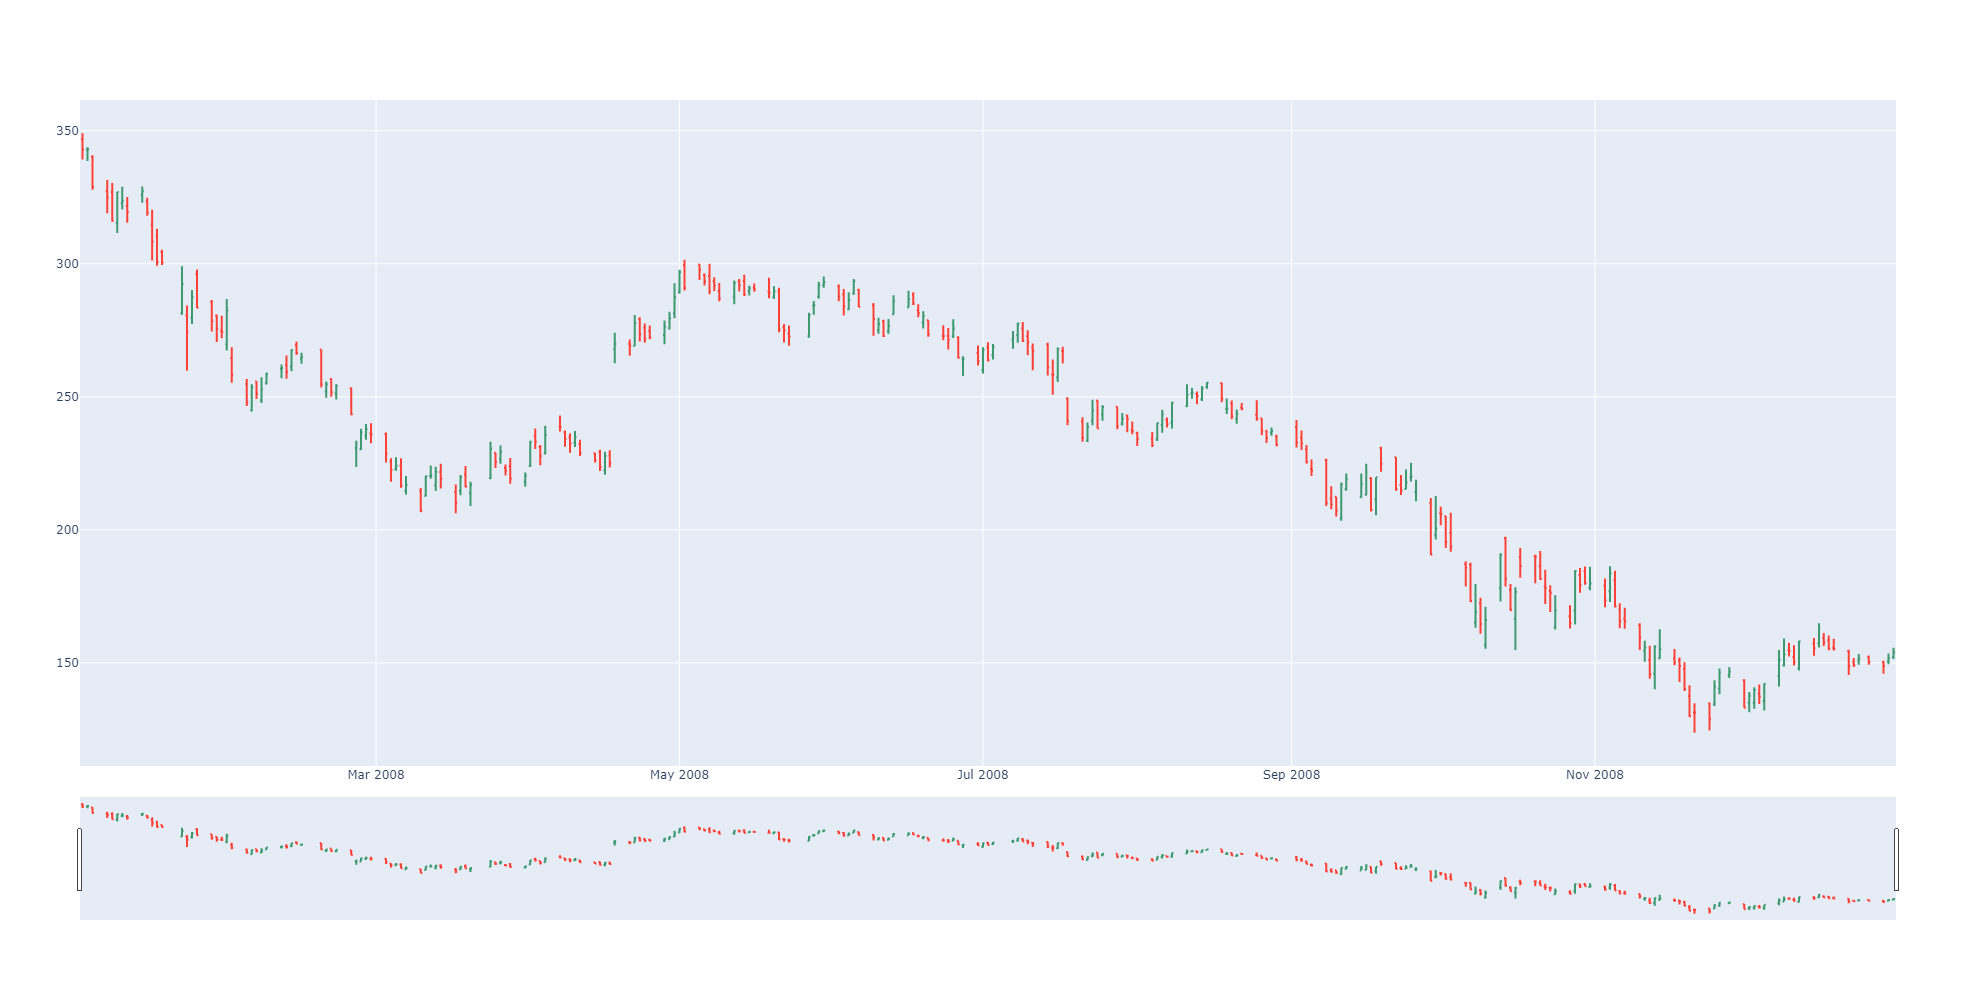

In [55]:
# OHLC chart of year 2008 of Google stocks

fig = go.Figure(data=go.Ohlc(x=google['2008'].index,
                             open=google['2008'].Open,
                             high=google['2008'].High,
                             low=google['2008'].Low,
                             close=google['2008'].Close
                            ))

fig.update_layout(height= 1000, width=2000)

fig.show()

In [ ]:
# OHLC chart of the entire Google stocks timeline

fig = go.Figure(data=go.Ohlc(x=google.index,
                             open=google.Open,
                             high=google.High,
                             low=google.Low,
                             close=google.Close
                            ))

fig.update_layout(height= 1000, width=2000)

fig.show()

# Candlestick charts

[Candlestick charts vs OHLC charts](https://www.youtube.com/watch?v=vv5ImI1X9G8)

This type of chart is used as a trading tool to visualise and analyse the price movements over time for securities, derivatives, currencies, stocks, bonds, commodities, etc. 
* Although the symbols used in Candlestick Charts resemble a Box Plot, they function differently and therefore, are not to be confused with one another.

Candlestick Charts display multiple bits of price information such as the open price, close price, highest price and lowest price through the use of candlestick-like symbols. 
* Each symbol represents the **compressed trading activity** for a single time period (a minute, hour, day, month, etc). Each Candlestick symbol is plotted along a time scale on the x-axis, to show the trading activity over time.

The main rectangle in the symbol is known as the **real body**, which is used to display the range between the open and close price of that time period. 
* While the lines extending from the bottom and top of the real body is known as the lower and upper shadows (or wick). 
* Each shadow represents the highest or lowest price traded during the time period represented. When the market is Bullish (the closing price is higher than it opened), then the body is coloured typically white or green. 
* But when the market is Bearish (the closing price is lower than it opened), then the body is usually coloured either black or red.

<img src = https://datavizcatalogue.com/methods/images/anatomy/SVG/candlestick_chart.svg>

Image sources from [Datavizcatalouge.](https://datavizcatalogue.com/methods/OHLC_chart.html)

Candlestick Charts are great for detecting and predicting market trends over time and are useful for interpreting the day-to-day sentiment of the market, through each candlestick symbol's colouring and shape. 
* For example, the longer the body is, the more intense the selling or buying pressure is. While, a very short body, would indicate that there is very little price movement in that time period and represents consolidation.

Candlestick Charts help reveal the market psychology (the fear and greed experienced by sellers and buyers) through the various indicators, such as shape and colour, but also by the many identifiable patterns that can be found in Candlestick Charts. 
* In total, there are 42 recognised patterns that are divided into simple and complex patterns. 
* These patterns found in Candlestick Charts are useful for displaying price relationships and can be used for predicting the possible future movement of the market. 
* You can find a list and description of each pattern here.

## Please bear in mind, that Candlestick Charts don't express the events taking place between the open and close price - only the relationship between the two prices. So you can't tell how volatile trading was within that single time period.

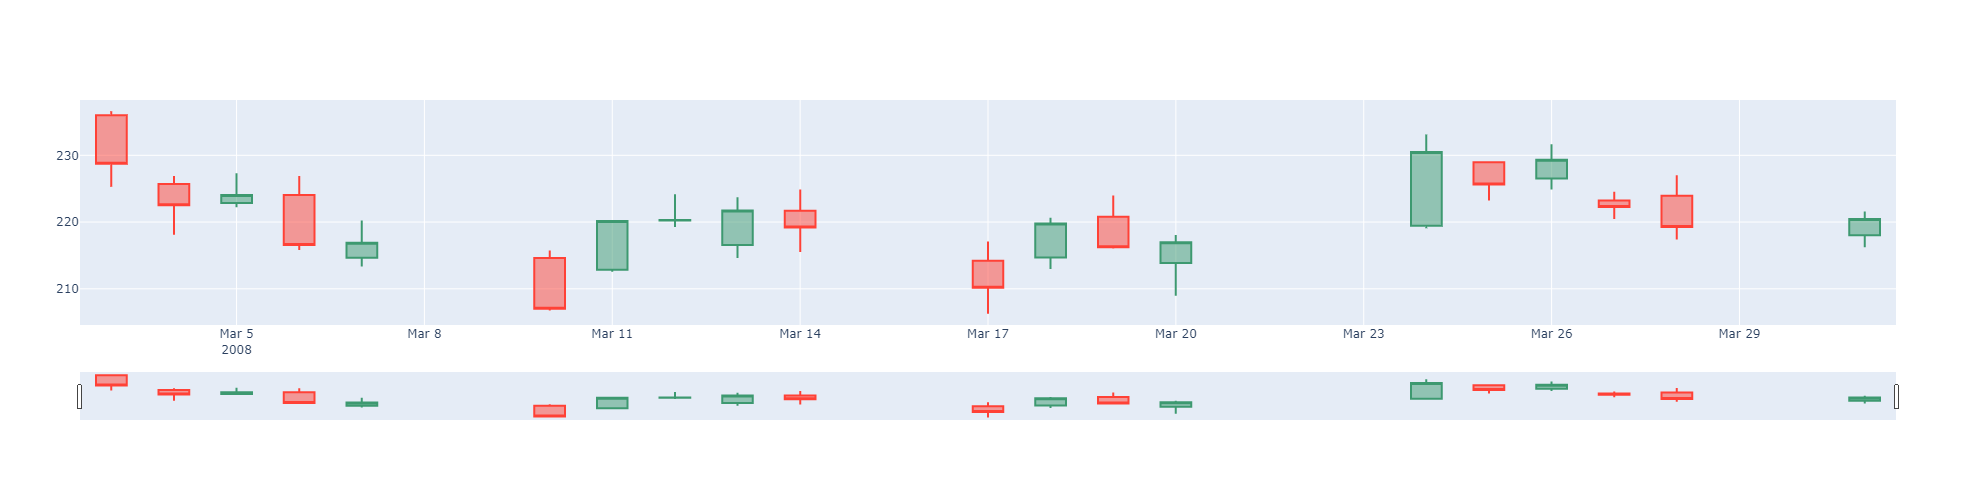

In [81]:
# Candlestick chart of the Google stocks in March 2008

fig = go.Figure(data=go.Candlestick(x=google['03-2008'].index,
                             open=google['03-2008'].Open,
                             high=google['03-2008'].High,
                             low=google['03-2008'].Low,
                             close=google['03-2008'].Close
                            ))

fig.update_layout(height= 500, width=1000)

fig.show()

In [ ]:
# Candlestick chart of the entire Google stocks timeline

fig = go.Figure(data=go.Candlestick(x=google.index,
                             open=google.Open,
                             high=google.High,
                             low=google.Low,
                             close=google.Close
                            ))

fig.update_layout(height= 500, width=1000)

fig.show()

# Autocorrelation and Partial Autocorrelation

* Autocorrelation - The autocorrelation function (ACF) measures how a series is **correlated with itself at different lags**.
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. 
    * The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.
    
More information here: 

## Autocorrelation

* We can calculate the correlation for time series observations with observations with previous time steps, called lags. 
* Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.
* Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

How autocorrelation works: https://www.youtube.com/watch?v=ZjaBn93YPWo

In [59]:
humidity["San Diego"]

datetime
2012-10-01 13:00:00    82.0
2012-10-01 14:00:00    81.0
2012-10-01 15:00:00    81.0
2012-10-01 16:00:00    81.0
2012-10-01 17:00:00    80.0
                       ... 
2017-11-29 20:00:00    72.0
2017-11-29 21:00:00    72.0
2017-11-29 22:00:00    68.0
2017-11-29 23:00:00    63.0
2017-11-30 00:00:00    72.0
Name: San Diego, Length: 45252, dtype: float64

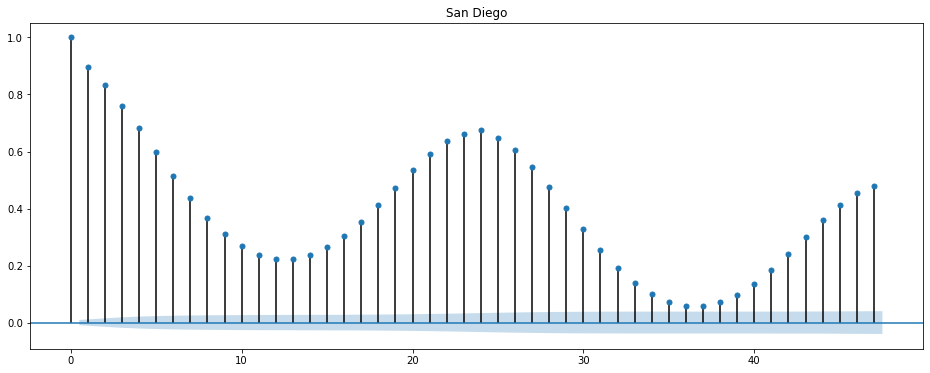

In [71]:
# Autocorrelation of humidity of San Diego
# Uses statsmodels library package

plot_acf(humidity["San Diego"],title="San Diego")
plt.show()

By default, all lag values are printed, which makes the plot noisy.

We can limit the number of lags on the x-axis to 50 to make the plot easier to read.

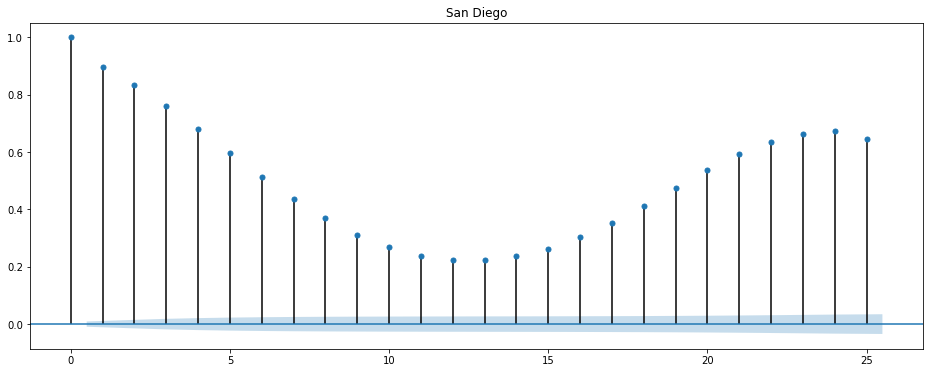

In [70]:
# Changing the lag value

plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

## Partial autocorrelation

* This function plays an important role in data analysis aimed at identifying the extent of the lag in an autoregressive model.
* Think partial autocorrelation as being error residuals that we haven't been able to fit yet. Error residuals being the future value minus the present day value to form a best fit line.
* A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed... ???
* In time series analysis, the partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. 
* It contrasts with the autocorrelation function, which does not control for other lags.

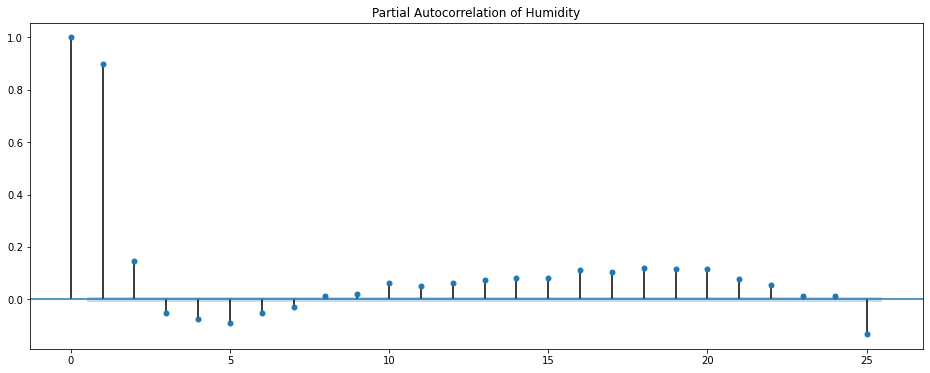

In [73]:
plot_pacf(humidity["San Diego"],lags=25)

plt.title('Partial Autocorrelation of Humidity')
plt.show()

All the values for humidity are statistically significant

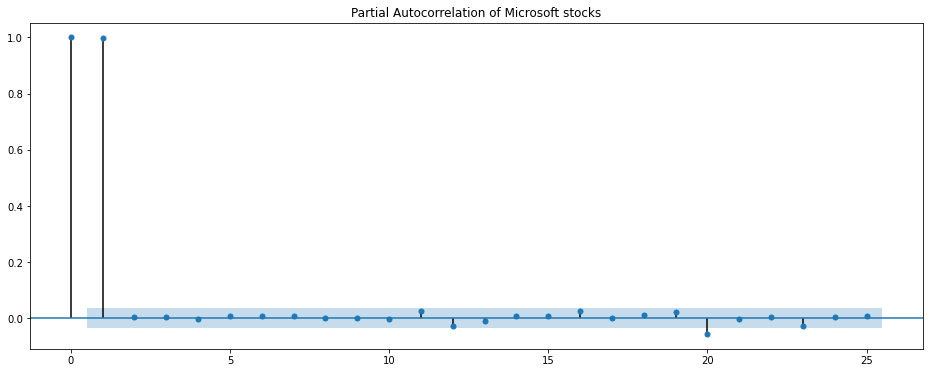

In [74]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(microsoft["Close"],lags=25)

plt.title('Partial Autocorrelation of Microsoft stocks')
plt.show()

Here, only 0th, 1st and 20th lag are statistically significant.

# Time series decomposition and Random walks

A time series can be decomposed of its constitutents that make it. This can be either through a additive decomposition or a multiplicative decomposition.

## Trends, seasonality and noise
These are the components of a time series

* Trend - Consistent upwards or downwards slope of a time series - 
    * This is extracted by a centered moving average of the data. 
    * The moving average smoother averages the nearest N periods of each observation. See image below:
    
<img src = https://miro.medium.com/max/1400/1*Xsr6SpaHsHVyzJUUJ42u7Q.png width = 500>    

* Seasonality - Clear periodic pattern of a time series(like sine funtion) - 
    * obtained by detrending the trend component, 
  
<img src = https://miro.medium.com/max/1400/1*Pqoza2aqNSNrnr670RGxAg.png width = 500>

    * extracting the seasonal component of the data by averaging the monthly detrended data every year such as below:
    
<img src = https://miro.medium.com/max/1400/1*3EIqDbXJJRSnduxxVxOymw.png width = 500>    
<img src = https://miro.medium.com/max/1400/1*D7Iw6HZ7yB_ooDgIT1q8ug.png width = 500>
    
    * The estimated seasonal pattern is assumed to repeat every year. This can be a problem for longer series where the patterns might change.
    * There are more robust methods like Seasonal and Trend decomposition using Loess — STL — that addresses some of these problems.
    
* Noise - Outliers or missing values

<img src = https://miro.medium.com/max/1400/1*wXJWxVqMGoPxlVMGnWxU3g.png width = 500>

Check this source for more detailled information: https://www.youtube.com/watch?v=85XU1T9DIps & https://medium.com/better-programming/a-visual-guide-to-time-series-decomposition-analysis-a1472bb9c930

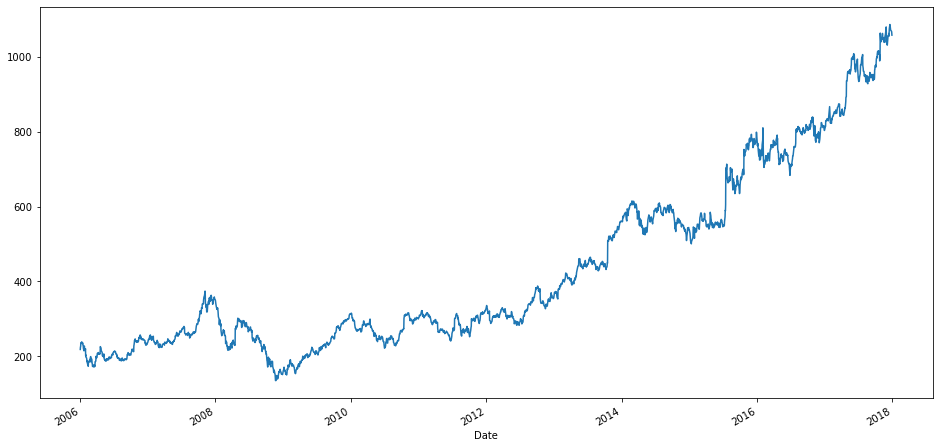

In [64]:
# Let's take Google stocks High for this example

google["High"].plot(figsize=(16,8))

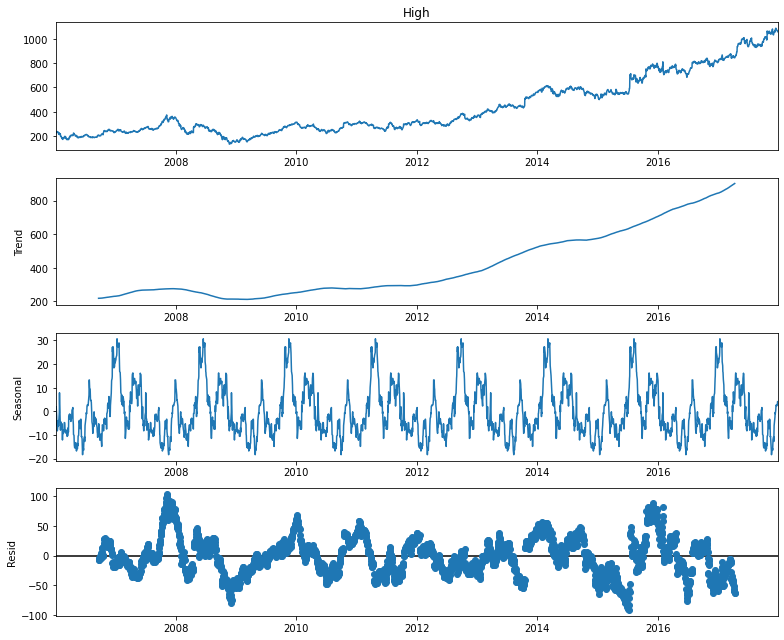

In [65]:
# Now, for decomposition...
# Using rcParams to customise Matplotlib with style sheets: https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html

rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google["High"],period=360) # Seasonal decomposition using moving averages, the frequncy is annual
figure = decomposed_google_volume.plot()
plt.show()

* There is clearly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values

# Checking stationarity

* In time series, the summary statistics of observations are consistent, (e.g. mean, max, min, etc) or being stationary.
* A stationary time series data does not have any upward or downward trend or seasonal effects. Mean or variance are consistent over time

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

* Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. 
    * Consequently, parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

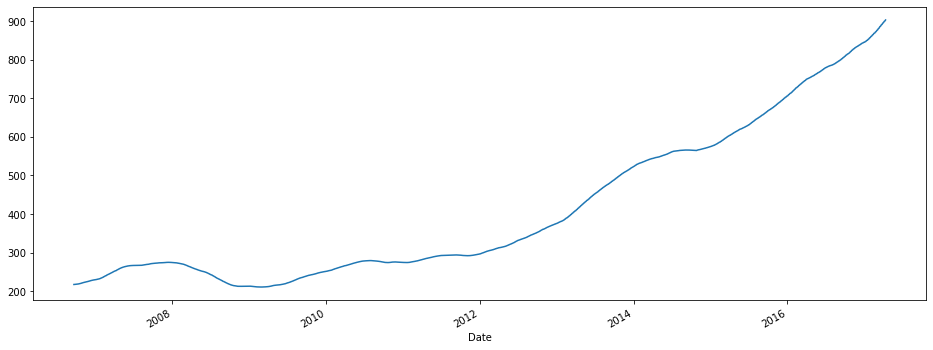

In [102]:
# The original non-stationary plot
decomposed_google_volume.trend.plot()

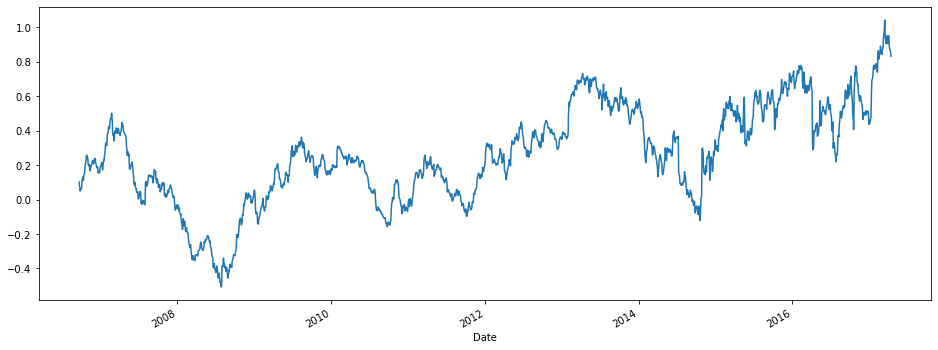

In [103]:
# The new stationary plot
decomposed_google_volume.trend.diff().plot()

## Stationarity can also be represented by a white noise series


### White Noise
White noise has...

* Constant mean
* Constant variance
* Zero auto-correlation at all lags

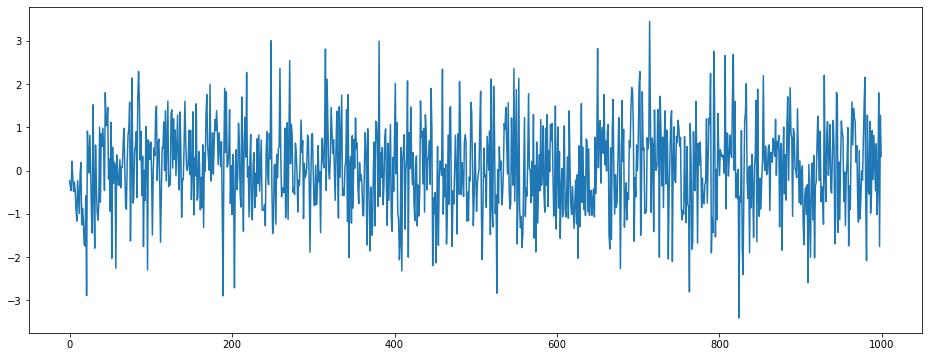

In [75]:
# Plotting white noise

rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000) # Draw random samples from a normal (Gaussian) distribution.
# loc is mean, scale is variance
plt.plot(white_noise)

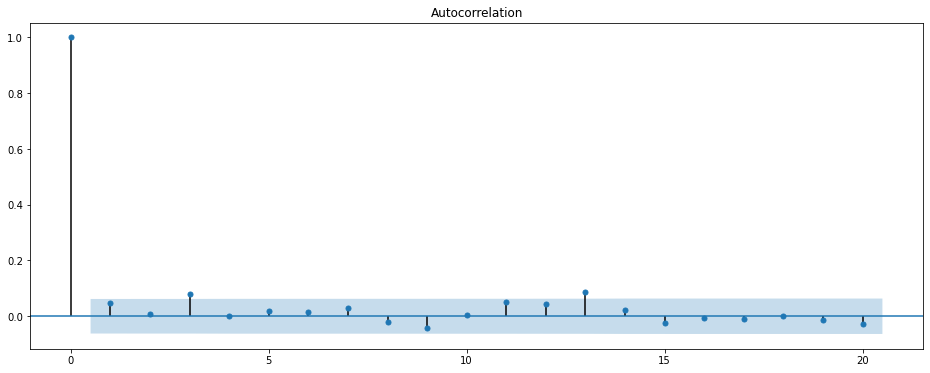

In [76]:
# Plotting autocorrelation of white noise

plot_acf(white_noise,lags=20)
plt.show()

See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).

# Random Walk

It is important to note that not all time series are predictable. 
* More specifically, some of them present no predictable patterns in the long term. 
* Such time series are difficult, if not impossible, to forecast since future movements are equally likely to be up or down.

To forecast this kind of data, we usually use the **random walk model**. 
* This model assumes that the next event is completely uncorrelated from the previous one. 
* Hence, forecasts from a random walk model are equal to the last observation plus some noise. 
* Random walk models are typically used with financial and economic data.
* Random walks are not **stationary**.

A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise such as the equation below:

Pt = Pt-1 + εt

Random walks can't be forecasted because well, noise is random.

Random Walk with Drift(drift(μ) is zero-mean)

Pt - Pt-1 = μ + εt

Regression test for random walk

Pt = α + βPt-1 + εt

Equivalent to Pt - Pt-1 = α + βPt-1 + εt

Test:

H0: β = 1 (This is a random walk)
H1: β < 1 (This is not a random walk)

Dickey-Fuller Test:

H0: β = 0 (This is a random walk)
H1: β < 0 (This is not a random walk)

## Augmented Dickey-Fuller (ADF) test

* An augmented Dickey–Fuller test (ADF) tests the null hypothesis (the hypothesis that there is no significant difference between specified populations, any observed difference being due to sampling or experimental error) that a unit root is present in a time series sample.
* A unit root is a stochastic (random) trend in a time series, sometimes called a “random walk with drift”;
* ADF statistic is a negative number and more negative it is the stronger the rejection of the hypothesis that there is a unit root.

    * **Null Hypotehsis (H0)**: If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    * **Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary.
    * **p-value > 0.05**: Accept H0, the data has a unit root and is non-stationary
    * **p-value ≤ 0.05**: Reject H0. the data does not have a unit root and is stationary

In [85]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks 

adf = adfuller(microsoft["Volume"])
print("ADF Statistic of microsoft: %f" % adf[0])
print("p-value of microsoft: %f" % adf[1])
adf = adfuller(google["Volume"])
print("ADF Statistic of google: %f" % adf[0])
print("p-value of google: %f" % adf[1])

ADF Statistic of microsoft: -4.381404
p-value of microsoft: 0.000320
ADF Statistic of google: -5.733723
p-value of google: 0.000001


* As microsoft has p-value 0.0003201525 which is less than 0.05, null hypothesis is rejected and this is not a random walk 
* Now google has p-value 0.0000006510 which is less than 0.05, null hypothesis is rejected and this is not a random walk

## Generating a random walk

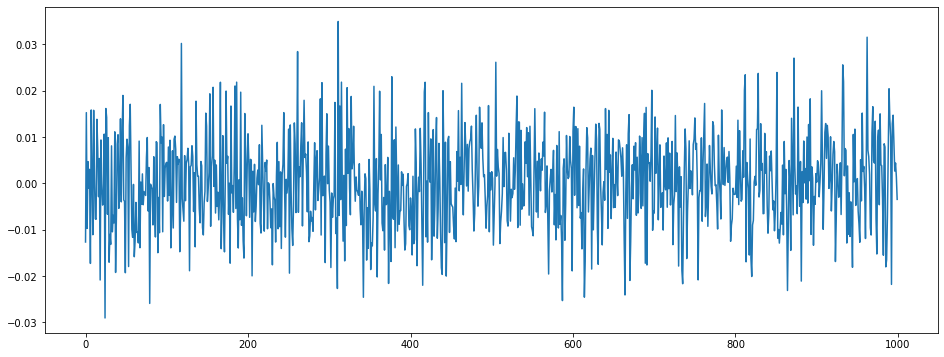

In [92]:
# Similar to generating a white noise pattern earlier

seed(30) # generate the same random walk pattern each time

rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000) # Draw random samples from a normal (Gaussian) distribution.
plt.plot(random_walk)
plt.show()

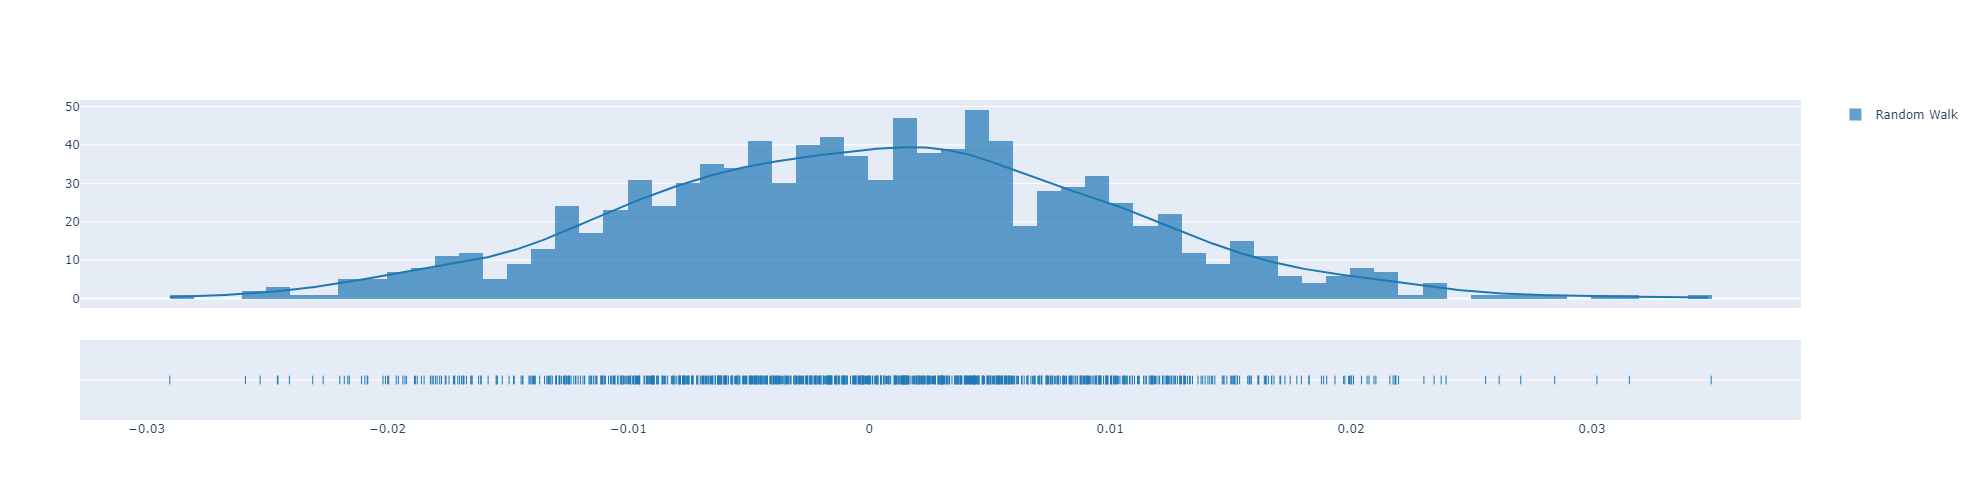

In [101]:
# Create a Distplot (statistical distributions) with plotly

fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)

fig.update_layout(height= 500, width=1000)

fig.show()

# AR Models (Section undergoing on-going work!)

Autoregressive model is a way to predict or analysis time series in data engineering. It is a regression model which depends linearly on how previous terms can affect the current term. It is simply an extension of the random walk.

Past time points of time series data can impact current and future time points. 
* Autoregressive models take this concept into account when forecasting current and future values. 
* Autoregressive models uses a number of lagged observations of time series to forecast observations. 
* A weight is applied to each of the past term and the weights can vary based on how recent they are.

The definition of AR is shown below:

<img src = https://miro.medium.com/max/768/1*qDLDHHfh0QQjNH2GjFOdAQ.png widtgh = 500>

* 𝜑: parameter of model (auto-regressive coefficient)
* c: constant
* 𝜀: white noise

In other words, the current value only depends on the previous value of the system. 

Representation: AR(p)

AR(p) where $p$ represents the number of previous (or lagged) terms used within the model

* AR(0): There is no effect of previous term, so only white noise can affect output.
* AR(1): Output only affected by the previous term and the white noise. When φ→0, output is just like white noise; when 𝜑→1, output is affected mainly by the previous term, it’s smoothing, and is similar to low pass filter.
* AR(2): When both 𝜑1 and 𝜑2 are positive, output resemble a low pass filter

Source: https://medium.com/@sakiomb32309/ar-autoregressive-model-d65d5ce3c41

**An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc.**

The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.

AR(1) model
Rt = μ + ϕRt-1 + εt

As the right hand side of the equation has only one lagged value(Rt-1), this is called AR model of order 1 where μ is mean and ε is noise at time t
If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.

AR(2) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + εt

AR(3) model
Rt = μ + ϕ1Rt-1 + ϕ2Rt-2 + ϕ3Rt-3 + εt

## Let's simulate an AR(1) model set to different parameters 

**Need to revisit this section again**

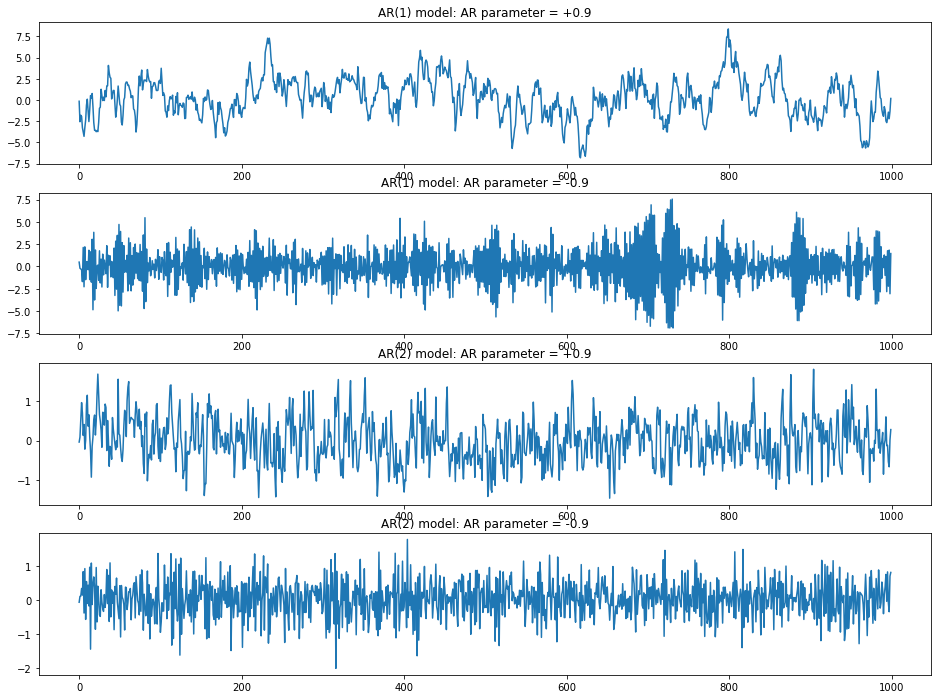

In [118]:
# AR(1) MA(1) model:AR parameter = +0.9
rcParams['figure.figsize'] = 16, 12
plt.subplot(4,1,1)
ar1 = np.array([1, -0.9]) # We choose -0.9 as AR parameter is +0.9, there is a negative term in the equation somewhere...? Need to check!
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)


# We will take care of MA model later

# AR(1) MA(1) AR parameter = -0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = -0.9')
plt.plot(sim2)


# AR(2) MA(1) AR parameter = 0.9
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9]) # We choose -0.9 as AR parameter is +0.9
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = +0.9')
plt.plot(sim3)


# AR(2) MA(1) AR parameter = -0.9
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9]) # We choose +0.9 as AR parameter is -0.9
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter = -0.9')
plt.plot(sim4)
plt.show()

## Forecasting a simulated AR model

In [132]:
# Autoregressive Moving Average ARMA(p,q) Model

model = ARMA(sim1, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1449.313
Method:                       css-mle   S.D. of innovations              1.030
Date:                Mon, 08 Jun 2020   AIC                           2904.626
Time:                        21:22:10   BIC                           2919.349
Sample:                             0   HQIC                          2910.221
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2673      0.309      0.865      0.387      -0.338       0.873
ar.L1.y        0.8955      0.014     64.167      0.000       0.868       0.923
                                    Roots           

ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.

## Predicting the AR models

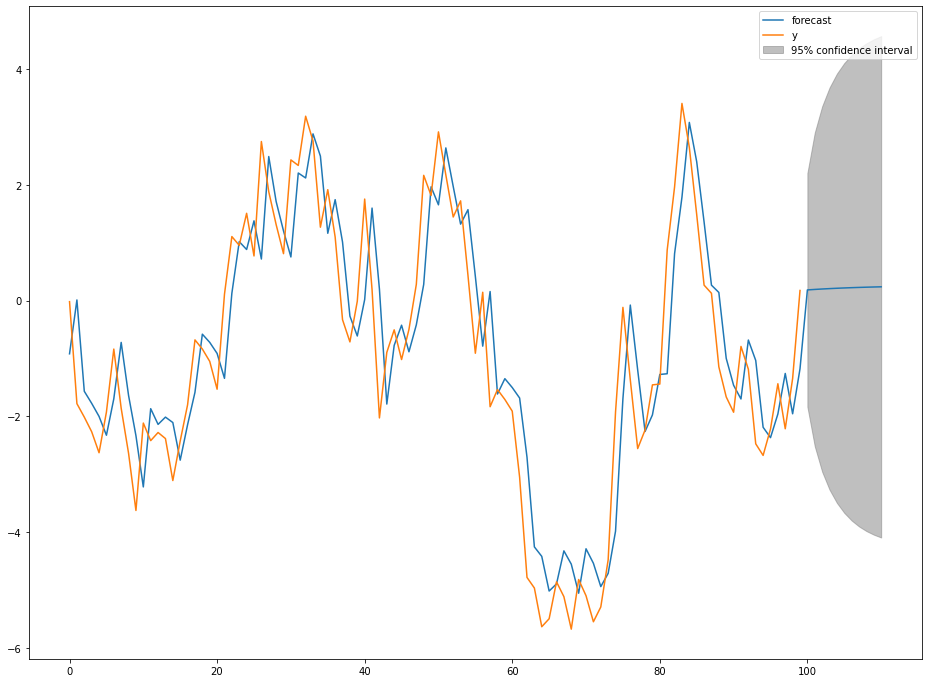

In [122]:
# Predicting simulated AR(1) model 

result.plot_predict(start=900, end=1010)
plt.show()

y is the actual data plot (orange) and the forecast is in (blue)

In [129]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.9995995523060794.


Hmm... interesting!

Further reading on the meaning of root mean squared error (RMSE): https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e

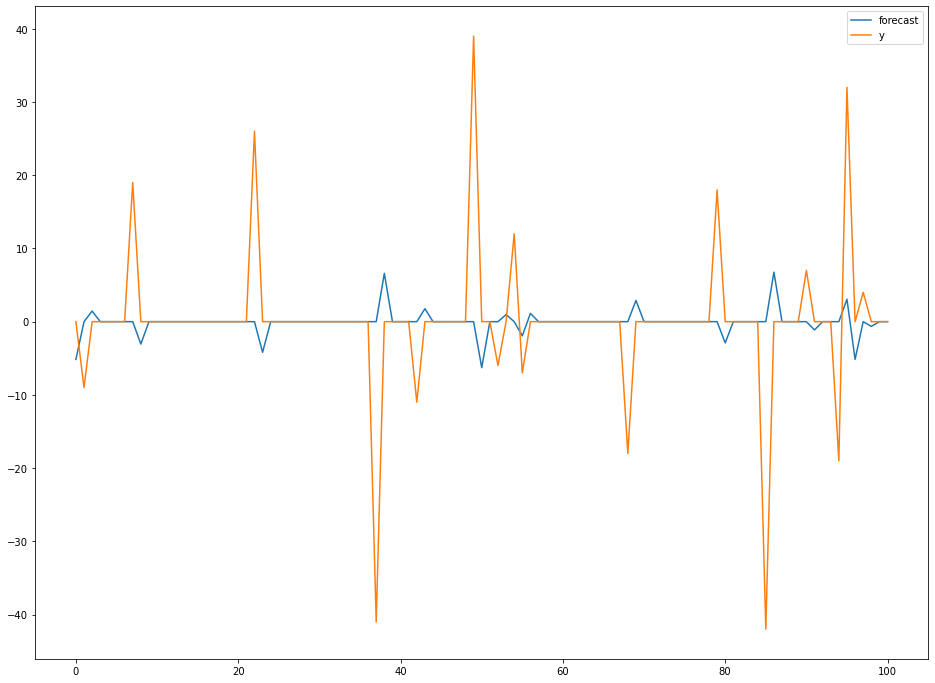

In [133]:
# Predicting humidity level of Montreal

humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0)) # Difference between the current element and the previous element in the row, starting after the 1st row, as the 1st row has nothing previous to compare to
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [138]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 6.988019259569309.


The RMSE is quite high, the model is not a good fit

## Predicting closing prices of google using AR model

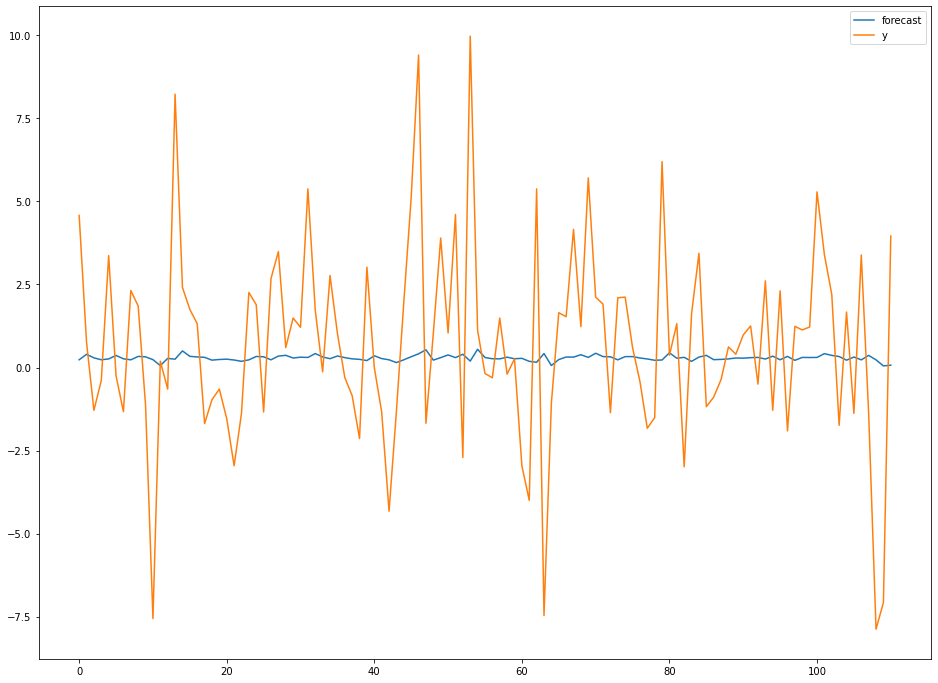

In [140]:
# Predicting closing prices of google

humid = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=900, end=1010)
plt.show()

## Not a good fit! Impossible to predict, there should be better models elsewhere...

# MA models

The moving-average (MA) model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

MA(1) model
Rt = μ + ϵt1 + θϵt-1

It translates to Today's returns = mean + today's noise + yesterday's noise

As there is only 1 lagged values on the right hand side of the equation, it is an MA model of order 1

## Simulating MA(1) model

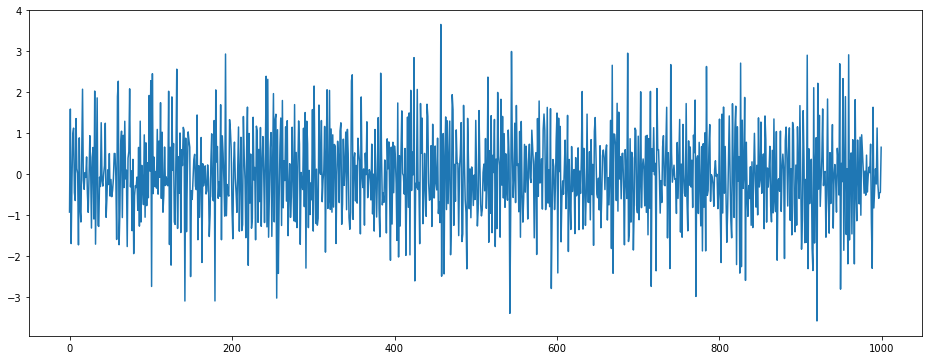

In [143]:
rcParams['figure.figsize'] = 16, 6
ar1 = np.array([1])
ma1 = np.array([1, -0.5])
MA1 = ArmaProcess(ar1, ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

## Forecasting the simulated MA model

In [144]:
model = ARMA(sim1, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1409.080
Method:                       css-mle   S.D. of innovations              0.990
Date:                Mon, 08 Jun 2020   AIC                           2824.159
Time:                        21:30:18   BIC                           2838.883
Sample:                             0   HQIC                          2829.755
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0250      0.014     -1.751      0.080      -0.053       0.003
ma.L1.y       -0.5443      0.026    -21.078      0.000      -0.595      -0.494
                                    Roots           

## Prediction using MA models

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Mon, 08 Jun 2020   AIC                         307043.965
Time:                        21:31:39   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.317      0.0

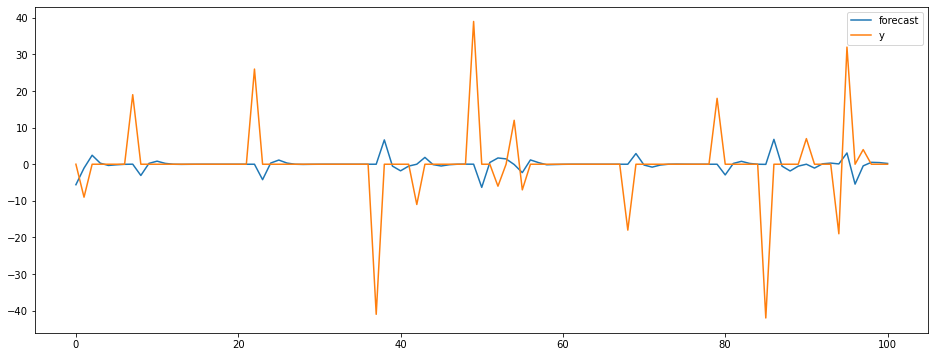

In [146]:
# Forecasting and predicting montreal humidity
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [147]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.345129261902766.


# ARMA Models

Autoregressive–moving-average (ARMA) models provide a parsimonious(frugal) description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. 

It's the fusion of AR and MA models.

ARMA(1,1) model

Rt = μ + ϕRt-1 + ϵt + θϵt-1

Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

## Prediction using ARMA models

There is no need to simulate any ARMA model because it's quite similar to AR and MA models. Just forecasting and predictions for this one.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751607.927
Date:                Mon, 08 Jun 2020   AIC                         110833.948
Time:                        21:35:29   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9915.253     -2.047      0.041   -3.97e+04    -863.683
ar.L1.y        0.2052      0.159      1.287      0.198      -0.107       0.518
ar.L2.y        0.7298      0.179      4.083      0.0

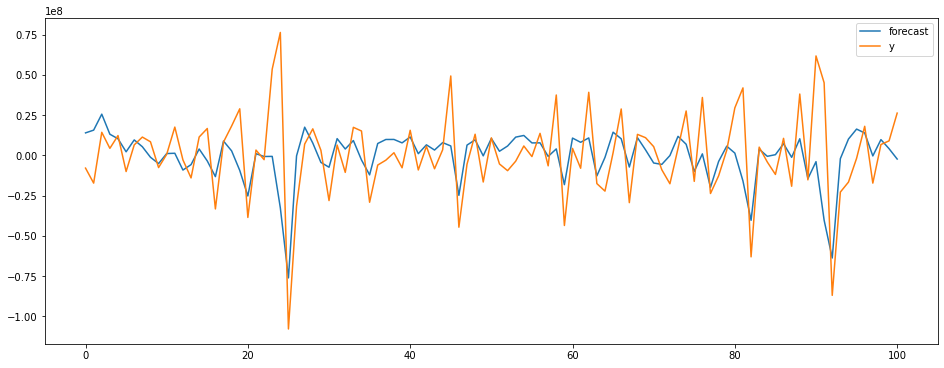

In [149]:
# Forecasting and predicting microsoft stocks volume

model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [150]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038324.543060355.


????????????

Apparently the ARMA model shows much better results than AR and MA models.

# ARIMA models

An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. 
* Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). 
* ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. 
* ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter.

ARIMA(1,0,0)
yt = a1yt-1 + ϵt

ARIMA(1,0,1)
yt = a1yt-1 + ϵt + b1ϵt-1

ARIMA(1,1,1)
Δyt = a1Δyt-1 + ϵt + b1ϵt-1 where Δyt = yt - yt-1

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.014
Date:                Mon, 08 Jun 2020   AIC                         112778.933
Time:                        21:37:38   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

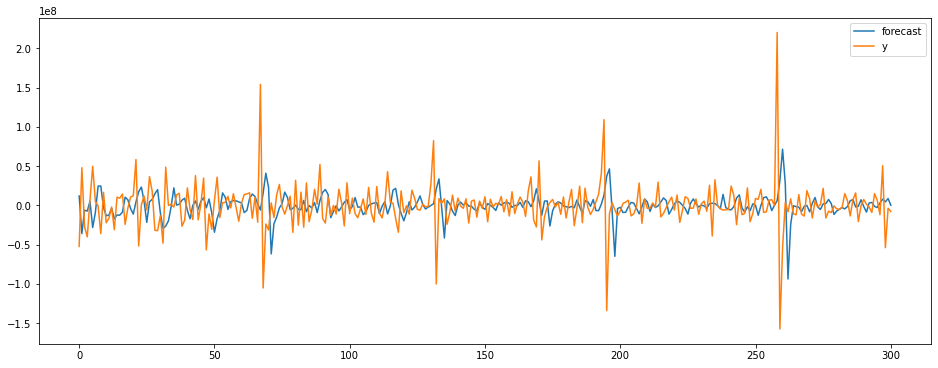

In [154]:
## Prediction using ARIMA model

# Predicting the microsoft stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [155]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937593.98493614.


# VAR models

Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. 
* VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. 
* All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term.
* VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: 
    * The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

C:\Users\Alistair\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

C:\Users\Alistair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.088
                          + intercept   AIC                          24404.176
Date:                Mon, 08 Jun 2020   BIC                          24506.386
Time:                        21:40:53   HQIC                         24440.929
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                77.63, 78.89   Jarque-Bera (JB):   48237.79, 14921.54
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.32, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

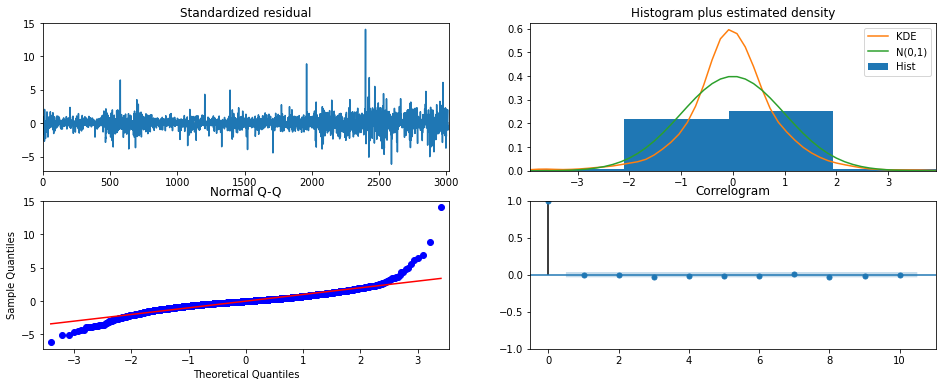

In [156]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

# State Space methods

A general state space model is of the form

yt=Ztαt+dt+εt

αt=Ttαt−1+ct+Rtηt

where yt refers to the observation vector at time t, αt refers to the (unobserved) state vector at time t, and where the irregular components are defined as

εt∼N(0,Ht)

ηt∼N(0,Qt)

The remaining variables (Zt,dt,Ht,Tt,ct,Rt,Qt) in the equations are matrices describing the process. Their variable names and dimensions are as follows

Z : design (k_endog×k_states×nobs)

d : obs_intercept (k_endog×nobs)

H : obs_cov (k_endog×k_endog×nobs)

T : transition (k_states×k_states×nobs)

c : state_intercept (k_states×nobs)

R : selection (k_states×k_posdef×nobs)

Q : state_cov (k_posdef×k_posdef×nobs)

In the case that one of the matrices is time-invariant (so that, for example, Zt=Zt+1 ∀ t), its last dimension may be of size 1 rather than size nobs.

This generic form encapsulates many of the most popular linear time series models (see below) and is very flexible, allowing estimation with missing observations, forecasting, impulse response functions, and much more.

# SARIMA models

SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. 
* The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10096.943
Date:                Mon, 08 Jun 2020   AIC                          20213.887
Time:                        21:41:28   BIC                          20274.010
Sample:                             0   HQIC                         20235.506
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1182      0.050      2.378      0.017       0.021       0.216
ar.L1          0.1915      0.006     31.680      0.000       0.180       0.203
ar.L2          1.1890      0.005    218.186      0.0

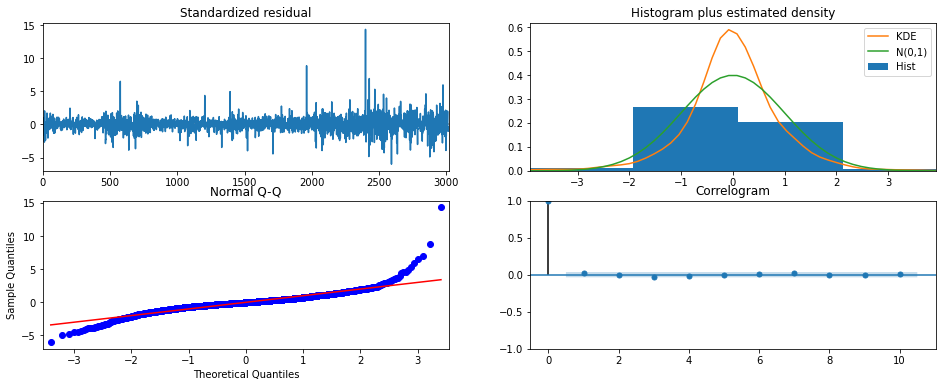

In [158]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

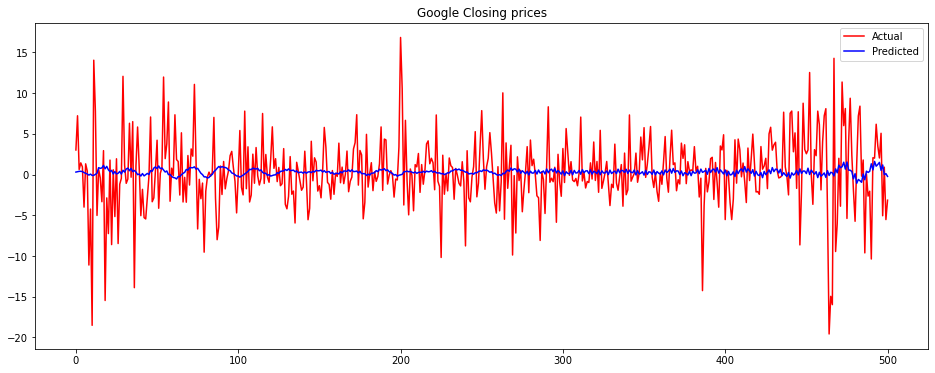

In [159]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

# Unobserved components

A UCM decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series. 

The following model shows a possible scenario: Source: http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Mon, 08 Jun 2020   AIC                          20237.023
Time:                        21:41:37   BIC                          20249.047
Sample:                             0   HQIC                         20241.346
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (Q):              

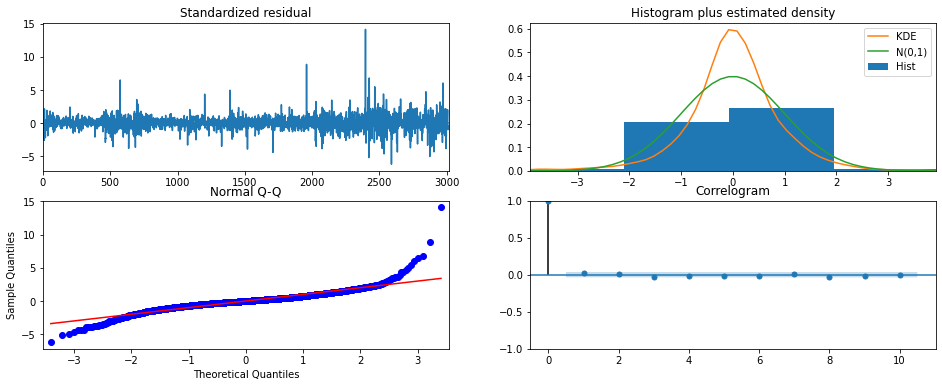

In [162]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

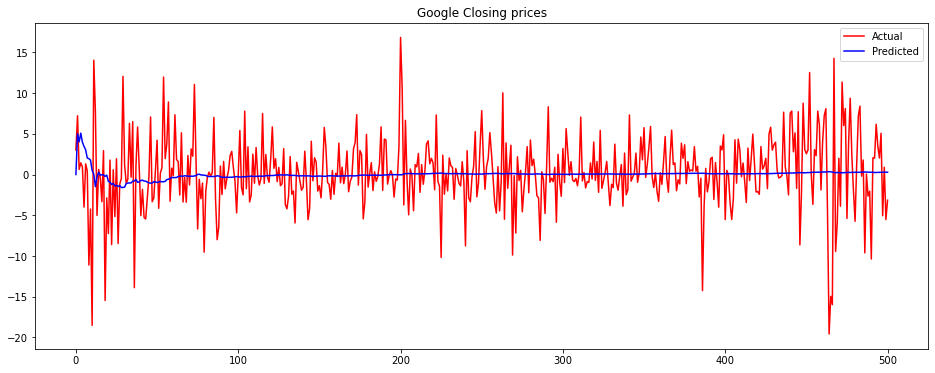

In [163]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

# Dynamic Factor models

Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. 

The unobserved factors may also be a function of exogenous covariates. 

The disturbances in the equations for the dependent variables may be autocorrelated.

C:\Users\Alistair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                 3018
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -12198.578
Date:                               Mon, 08 Jun 2020   AIC                          24409.156
Time:                                       21:42:31   BIC                          24445.231
Sample:                                            0   HQIC                         24422.128
                                              - 3018                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):                77.67, 95.04   Jarque-Bera (JB):   48192.32, 15035.30
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.36, 1.62   Skew:                      1.14, -0

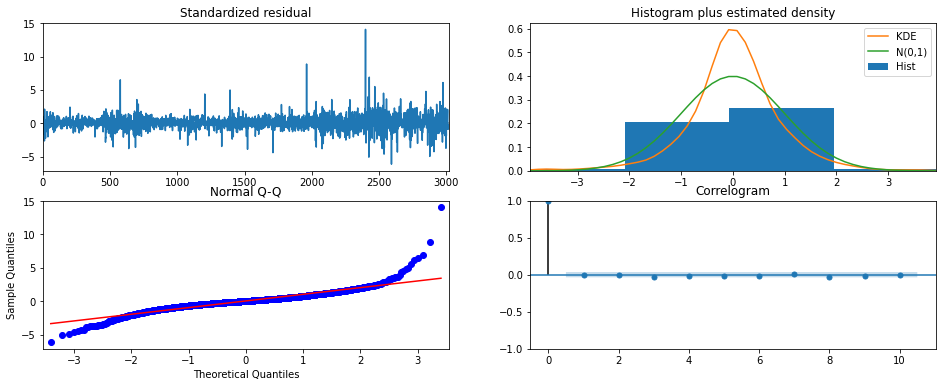

In [164]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))